In [ ]:
import pandas as pd
from pathlib import Path
import os
import glob
import math
def rstr(df): return df.shape, df.apply(lambda x: [x.unique()])
import networkx as nx
from matplotlib import pyplot as plt

In [4]:
# path may need to be changed
# data_dir = "/Users/NathanBick/Documents/Graduate School/MATH517 - Social Network Analysis/final-proj/"
data_dir = "/Users/davidanderson/Desktop/angela/georgetown/social-networks/math517-final-proj/"

extension = 'csv'
os.chdir(data_dir)
files = glob.glob('*.{}'.format(extension))
print(files)

['pamela_linkedin_connections.csv', 'nathan_linkedin_connections.csv', 'angela_linkedin_connections.csv']


Read in the CSV data for the different sub-networks

In [7]:
linkedin_data = pd.DataFrame()

for file in files:
    print(data_dir + file)
    tmp = pd.read_csv(data_dir + file,skiprows=3)
    tmp['source_file'] = file
    linkedin_data = linkedin_data.append(tmp)

/Users/davidanderson/Desktop/angela/georgetown/social-networks/math517-final-proj/pamela_linkedin_connections.csv
/Users/davidanderson/Desktop/angela/georgetown/social-networks/math517-final-proj/nathan_linkedin_connections.csv
/Users/davidanderson/Desktop/angela/georgetown/social-networks/math517-final-proj/angela_linkedin_connections.csv


/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/3818394218.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  linkedin_data = linkedin_data.append(tmp)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/3818394218.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  linkedin_data = linkedin_data.append(tmp)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/3818394218.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  linkedin_data = linkedin_data.append(tmp)


In [8]:
#print(linkedin_data)
linkedin_data.groupby(['source_file']).count()

,First Name,Last Name,Email Address,Company,Position,Connected On
source_file,,,,,,
angela_linkedin_connections.csv,255,255,1,254,254,255
nathan_linkedin_connections.csv,641,641,3,639,639,644
pamela_linkedin_connections.csv,64,64,1,63,63,64


Using the data that we read, create adjacency list for networks using alternate possible definitions of edges:

* linkedin connection - there would be three main nodes (each of the group members) and then all of those connections in the rows
* same employer defines an edge - this requires looping through each name to create each as a node. Then loop through the other 

In [9]:
linkedin_data['Full Name'] = linkedin_data['First Name'] + " " + linkedin_data['Last Name']
nodes = linkedin_data['Full Name'].unique() 
companies = linkedin_data['Company'].unique()
print(nodes)
len(nodes)

['Forrest Warner' 'Ron Fireman' 'Abhishek Patnia' 'Miao(Annabella) Miao'
 'yanfeng Lai' 'Jocelyn Huang' 'Vania Todorova' 'Dr. Hernani Costa'
 'Rakshitha Sankineni' 'Prarthana Bhattarai' 'Christopher Harris'
 'Md Arafat Hossain Khan' 'Shiv Rathod' 'Anirudh Venkateshwaran'
 'Purva Shanker' 'Josie (Yichen) Zhang' 'Minh B. Le, PhD, CFA'
 'Saif Abuhashish' 'Adithya Ramanathan' 'Diana Mingels' 'Tarek Lahlou'
 'Neil Acharya' 'Alex Bussan' 'Andrew Stern' 'Ilana Gharib'
 'Daniel Jennings' 'Ronit Gopalani' 'Stephen Haptonstahl' "Stalin D'Souza"
 'Parag Jain' 'Jonathan Gross' 'Oluwatobi Olabiyi' 'Graham Park'
 'Nathan Wolfe' 'Benjamin Fineran' 'Arturo Hernandez' 'Zachary Brown, PhD'
 'Victor Alvarez' 'Andrew Oestreicher' 'Alston Clark' 'Oron Gill Haus'
 'Mathias Menasi' 'Carlton Marshall II' 'Thuc Tran' 'Kunlaya Soiaporn'
 'Oliver Bentham' 'Tate Travaglini' 'Jason Filippou ⌨' 'Adam Psarouthakis'
 'Kwan-yuet Ho' 'Amanda (Mandy) Pearce' 'Benjamin Constantine'
 'Skylar Oke' "Han 'Pamela' Phan" 'Bill

888

In [10]:
linkedin_data.loc[linkedin_data['Full Name'] == 'David Bick']['Company']

403    Cerebras Systems
124    Cerebras Systems
Name: Company, dtype: object

In [11]:
test =  linkedin_data[linkedin_data['Full Name'] == "David Bick"]["Company"]

test.values[0]

'Cerebras Systems'

In [12]:
employer_network = pd.DataFrame()
n = 100
# loop through the unqiue node values. Create a row in the network. 
# For each unique node, loop through all the nodes again, see if the two have the same employer. 
# if they do have the same employer, add to the adjacency list
for node1 in nodes[:n]:
    for node2 in nodes[:n]:
        if node1 != node2:
            print("Node1 Name: " + str(node1))
            print("Node2 Name: " + str(node2))
            node1_company = linkedin_data.loc[linkedin_data['Full Name'] == node1]['Company']
            node2_company = linkedin_data.loc[linkedin_data['Full Name'] == node2]['Company']
            print("Node1 Company: " + str(node1_company.values[0]))
            print("Node2  Company: " + str(node2_company.values[0]))
            if node1_company.values[0] == node2_company.values[0]:
                data = [[str(node1),str(node2),str(node1_company.values[0])]]
                # Create the pandas DataFrame
                df = pd.DataFrame(data, columns=['Node1', 'Node2','Company'])
                employer_network = employer_network.append(df)



Node1 Name: Forrest Warner
Node2 Name: Ron Fireman
Node1 Company: Tinder
Node2  Company: Tinder
Node1 Name: Forrest Warner
Node2 Name: Abhishek Patnia
Node1 Company: Tinder
Node2  Company: Tinder
Node1 Name: Forrest Warner
Node2 Name: Miao(Annabella) Miao
Node1 Company: Tinder
Node2  Company: Tinder
Node1 Name: Forrest Warner
Node2 Name: yanfeng Lai
Node1 Company: Tinder
Node2  Company: nan
Node1 Name: Forrest Warner
Node2 Name: Jocelyn Huang
Node1 Company: Tinder
Node2  Company: Spotify
Node1 Name: Forrest Warner
Node2 Name: Vania Todorova
Node1 Company: Tinder
Node2  Company: Signify
Node1 Name: Forrest Warner
Node2 Name: Dr. Hernani Costa
Node1 Company: Tinder
Node2  Company: experdata
Node1 Name: Forrest Warner
Node2 Name: Rakshitha Sankineni
Node1 Company: Tinder
Node2  Company: Square
Node1 Name: Forrest Warner
Node2 Name: Prarthana Bhattarai
Node1 Company: Tinder
Node2  Company: Capital One
Node1 Name: Forrest Warner
Node2 Name: Christopher Harris
Node1 Company: Tinder
Node2  Co

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Ron Fireman
Node2 Name: Abhishek Patnia
Node1 Company: Tinder
Node2  Company: Tinder
Node1 Name: Ron Fireman
Node2 Name: Miao(Annabella) Miao
Node1 Company: Tinder
Node2  Company: Tinder
Node1 Name: Ron Fireman
Node2 Name: yanfeng Lai
Node1 Company: Tinder
Node2  Company: nan
Node1 Name: Ron Fireman
Node2 Name: Jocelyn Huang
Node1 Company: Tinder
Node2  Company: Spotify
Node1 Name: Ron Fireman
Node2 Name: Vania Todorova
Node1 Company: Tinder
Node2  Company: Signify
Node1 Name: Ron Fireman
Node2 Name: Dr. Hernani Costa
Node1 Company: Tinder
Node2  Company: experdata
Node1 Name: Ron Fireman
Node2 Name: Rakshitha Sankineni
Node1 Company: Tinder
Node2  Company: Square
Node1 Name: Ron Fireman
Node2 Name: Prarthana Bhattarai
Node1 Company: Tinder
Node2  Company: Capital One
Node1 Name: Ron Fireman
Node2 Name: Christopher Harris
Node1 Company: Tinder
Node2  Company: Capital One
Node1 Name: Ron Fireman
Node2 Name: Md Arafat Hossain Khan
Node1 Company: Tinder
Node2  Company: Capital

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)



Node2  Company: dv01
Node1 Name: Ron Fireman
Node2 Name: Kevin Li
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Ron Fireman
Node2 Name: Kirill Sukhanov
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Ron Fireman
Node2 Name: Priya Chandrashekar
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Ron Fireman
Node2 Name: Shawn Ard
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Ron Fireman
Node2 Name: Chris Sullivan
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Ron Fireman
Node2 Name: Rithy Huot
Node1 Company: Tinder
Node2  Company: Jane Technologies, Inc.
Node1 Name: Ron Fireman
Node2 Name: Musen Lin
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Ron Fireman
Node2 Name: Megan Toronto
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Ron Fireman
Node2 Name: Samuel Hillier
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Ron Fireman
Node2 Name: Chelsea Melman
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Ron Fireman
Node2 Name

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)



Node1 Name: Abhishek Patnia
Node2 Name: Ronit Gopalani
Node1 Company: Tinder
Node2  Company: PCS Wireless
Node1 Name: Abhishek Patnia
Node2 Name: Stephen Haptonstahl
Node1 Company: Tinder
Node2  Company: Transfix
Node1 Name: Abhishek Patnia
Node2 Name: Stalin D'Souza
Node1 Company: Tinder
Node2  Company: Capital One
Node1 Name: Abhishek Patnia
Node2 Name: Parag Jain
Node1 Company: Tinder
Node2  Company: comScore, Inc.
Node1 Name: Abhishek Patnia
Node2 Name: Jonathan Gross
Node1 Company: Tinder
Node2  Company: PreciseTarget
Node1 Name: Abhishek Patnia
Node2 Name: Oluwatobi Olabiyi
Node1 Company: Tinder
Node2  Company: NVIDIA
Node1 Name: Abhishek Patnia
Node2 Name: Graham Park
Node1 Company: Tinder
Node2  Company: Virtual Peaker
Node1 Name: Abhishek Patnia
Node2 Name: Nathan Wolfe
Node1 Company: Tinder
Node2  Company: Capital One
Node1 Name: Abhishek Patnia
Node2 Name: Benjamin Fineran
Node1 Company: Tinder
Node2  Company: Neural Magic
Node1 Name: Abhishek Patnia
Node2 Name: Arturo Hern

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)


Node1 Name: Miao(Annabella) Miao
Node2 Name: Abhishek Patnia
Node1 Company: Tinder
Node2  Company: Tinder
Node1 Name: Miao(Annabella) Miao
Node2 Name: yanfeng Lai
Node1 Company: Tinder
Node2  Company: nan
Node1 Name: Miao(Annabella) Miao
Node2 Name: Jocelyn Huang
Node1 Company: Tinder
Node2  Company: Spotify
Node1 Name: Miao(Annabella) Miao
Node2 Name: Vania Todorova
Node1 Company: Tinder
Node2  Company: Signify
Node1 Name: Miao(Annabella) Miao
Node2 Name: Dr. Hernani Costa
Node1 Company: Tinder
Node2  Company: experdata
Node1 Name: Miao(Annabella) Miao
Node2 Name: Rakshitha Sankineni
Node1 Company: Tinder
Node2  Company: Square
Node1 Name: Miao(Annabella) Miao
Node2 Name: Prarthana Bhattarai
Node1 Company: Tinder
Node2  Company: Capital One
Node1 Name: Miao(Annabella) Miao
Node2 Name: Christopher Harris
Node1 Company: Tinder
Node2  Company: Capital One
Node1 Name: Miao(Annabella) Miao
Node2 Name: Md Arafat Hossain Khan
Node1 Company: Tinder
Node2  Company: Capital One
Node1 Name: Miao

Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Miao(Annabella) Miao
Node2 Name: Chris Sullivan
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Miao(Annabella) Miao
Node2 Name: Rithy Huot
Node1 Company: Tinder
Node2  Company: Jane Technologies, Inc.
Node1 Name: Miao(Annabella) Miao
Node2 Name: Musen Lin
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Miao(Annabella) Miao
Node2 Name: Megan Toronto
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Miao(Annabella) Miao
Node2 Name: Samuel Hillier
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Miao(Annabella) Miao
Node2 Name: Chelsea Melman
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Miao(Annabella) Miao
Node2 Name: Zhijie Ji
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Miao(Annabella) Miao
Node2 Name: Joseph Ambrose
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Miao(Annabella) Miao
Node2 Name: Benjamin Carlsen
Node1 Company: Tinder
Node2  Company: dv01
Node1 Name: Miao(Annabel

Node2  Company: dv01
Node1 Name: yanfeng Lai
Node2 Name: Mitchell Wemhoff
Node1 Company: nan
Node2  Company: dv01
Node1 Name: yanfeng Lai
Node2 Name: Michelle  Herrera
Node1 Company: nan
Node2  Company: dv01
Node1 Name: yanfeng Lai
Node2 Name: Gregory Stretton
Node1 Company: nan
Node2  Company: dv01
Node1 Name: yanfeng Lai
Node2 Name: Steven Shonts
Node1 Company: nan
Node2  Company: dv01
Node1 Name: yanfeng Lai
Node2 Name: Kevin Li
Node1 Company: nan
Node2  Company: dv01
Node1 Name: yanfeng Lai
Node2 Name: Kirill Sukhanov
Node1 Company: nan
Node2  Company: dv01
Node1 Name: yanfeng Lai
Node2 Name: Priya Chandrashekar
Node1 Company: nan
Node2  Company: dv01
Node1 Name: yanfeng Lai
Node2 Name: Shawn Ard
Node1 Company: nan
Node2  Company: dv01
Node1 Name: yanfeng Lai
Node2 Name: Chris Sullivan
Node1 Company: nan
Node2  Company: dv01
Node1 Name: yanfeng Lai
Node2 Name: Rithy Huot
Node1 Company: nan
Node2  Company: Jane Technologies, Inc.
Node1 Name: yanfeng Lai
Node2 Name: Musen Lin
Node1 C

Node1 Company: Spotify
Node2  Company: dv01
Node1 Name: Jocelyn Huang
Node2 Name: Brianna Torres
Node1 Company: Spotify
Node2  Company: dv01
Node1 Name: Jocelyn Huang
Node2 Name: Jack Olson
Node1 Company: Spotify
Node2  Company: dv01
Node1 Name: Jocelyn Huang
Node2 Name: Tony Chen
Node1 Company: Spotify
Node2  Company: dv01
Node1 Name: Jocelyn Huang
Node2 Name: Mitchell Wemhoff
Node1 Company: Spotify
Node2  Company: dv01
Node1 Name: Jocelyn Huang
Node2 Name: Michelle  Herrera
Node1 Company: Spotify
Node2  Company: dv01
Node1 Name: Jocelyn Huang
Node2 Name: Gregory Stretton
Node1 Company: Spotify
Node2  Company: dv01
Node1 Name: Jocelyn Huang
Node2 Name: Steven Shonts
Node1 Company: Spotify
Node2  Company: dv01
Node1 Name: Jocelyn Huang
Node2 Name: Kevin Li
Node1 Company: Spotify
Node2  Company: dv01
Node1 Name: Jocelyn Huang
Node2 Name: Kirill Sukhanov
Node1 Company: Spotify
Node2  Company: dv01
Node1 Name: Jocelyn Huang
Node2 Name: Priya Chandrashekar
Node1 Company: Spotify
Node2  Com

Node1 Company: experdata
Node2  Company: Logistics Plus Inc.
Node1 Name: Dr. Hernani Costa
Node2 Name: Ronit Gopalani
Node1 Company: experdata
Node2  Company: PCS Wireless
Node1 Name: Dr. Hernani Costa
Node2 Name: Stephen Haptonstahl
Node1 Company: experdata
Node2  Company: Transfix
Node1 Name: Dr. Hernani Costa
Node2 Name: Stalin D'Souza
Node1 Company: experdata
Node2  Company: Capital One
Node1 Name: Dr. Hernani Costa
Node2 Name: Parag Jain
Node1 Company: experdata
Node2  Company: comScore, Inc.
Node1 Name: Dr. Hernani Costa
Node2 Name: Jonathan Gross
Node1 Company: experdata
Node2  Company: PreciseTarget
Node1 Name: Dr. Hernani Costa
Node2 Name: Oluwatobi Olabiyi
Node1 Company: experdata
Node2  Company: NVIDIA
Node1 Name: Dr. Hernani Costa
Node2 Name: Graham Park
Node1 Company: experdata
Node2  Company: Virtual Peaker
Node1 Name: Dr. Hernani Costa
Node2 Name: Nathan Wolfe
Node1 Company: experdata
Node2  Company: Capital One
Node1 Name: Dr. Hernani Costa
Node2 Name: Benjamin Fineran


Node1 Company: Capital One
Node2  Company: Tinder
Node1 Name: Prarthana Bhattarai
Node2 Name: Abhishek Patnia
Node1 Company: Capital One
Node2  Company: Tinder
Node1 Name: Prarthana Bhattarai
Node2 Name: Miao(Annabella) Miao
Node1 Company: Capital One
Node2  Company: Tinder
Node1 Name: Prarthana Bhattarai
Node2 Name: yanfeng Lai
Node1 Company: Capital One
Node2  Company: nan
Node1 Name: Prarthana Bhattarai
Node2 Name: Jocelyn Huang
Node1 Company: Capital One
Node2  Company: Spotify
Node1 Name: Prarthana Bhattarai
Node2 Name: Vania Todorova
Node1 Company: Capital One
Node2  Company: Signify
Node1 Name: Prarthana Bhattarai
Node2 Name: Dr. Hernani Costa
Node1 Company: Capital One
Node2  Company: experdata
Node1 Name: Prarthana Bhattarai
Node2 Name: Rakshitha Sankineni
Node1 Company: Capital One
Node2  Company: Square
Node1 Name: Prarthana Bhattarai
Node2 Name: Christopher Harris
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Prarthana Bhattarai
Node2 Name: Md Arafat Ho

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Prarthana Bhattarai
Node2 Name: Ilana Gharib
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Prarthana Bhattarai
Node2 Name: Daniel Jennings
Node1 Company: Capital One
Node2  Company: Logistics Plus Inc.
Node1 Name: Prarthana Bhattarai
Node2 Name: Ronit Gopalani
Node1 Company: Capital One
Node2  Company: PCS Wireless
Node1 Name: Prarthana Bhattarai
Node2 Name: Stephen Haptonstahl
Node1 Company: Capital One
Node2  Company: Transfix
Node1 Name: Prarthana Bhattarai
Node2 Name: Stalin D'Souza
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Prarthana Bhattarai
Node2 Name: Parag Jain
Node1 Company: Capital One
Node2  Company: comScore, Inc.
Node1 Name: Prarthana Bhattarai
Node2 Name: Jonathan Gross
Node1 Company: Capital One
Node2  Company: PreciseTarget
Node1 Name: Prarthana Bhattarai
Node2 Name: Oluwatobi Olabiyi
Node1 Company: Capital One
Node2  Company: NVIDIA
Node1 Name: Prarthana Bhattarai
Node2 Name: Graham Park
Node1 Company: Capital 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: The Washington Post
Node1 Name: Prarthana Bhattarai
Node2 Name: Tate Travaglini
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Prarthana Bhattarai
Node2 Name: Jason Filippou ⌨
Node1 Company: Capital One
Node2  Company: FINRA
Node1 Name: Prarthana Bhattarai
Node2 Name: Adam Psarouthakis
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Prarthana Bhattarai
Node2 Name: Kwan-yuet Ho
Node1 Company: Capital One
Node2  Company: Leidos
Node1 Name: Prarthana Bhattarai
Node2 Name: Amanda (Mandy) Pearce
Node1 Company: Capital One
Node2  Company: Verint
Node1 Name: Prarthana Bhattarai
Node2 Name: Benjamin Constantine
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Prarthana Bhattarai
Node2 Name: Skylar Oke
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Prarthana Bhattarai
Node2 Name: Han 'Pamela' Phan
Node1 Company: Capital One
Node2  Company: Accenture
Node1 Name: Prarthana Bhattarai
Node2 Name: Billy Taggart
Node1 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Christopher Harris
Node2 Name: Md Arafat Hossain Khan
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Christopher Harris
Node2 Name: Shiv Rathod
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Christopher Harris
Node2 Name: Anirudh Venkateshwaran
Node1 Company: Capital One
Node2  Company: Data Science for Sustainable Development
Node1 Name: Christopher Harris
Node2 Name: Purva Shanker
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Christopher Harris
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Christopher Harris
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Christopher Harris
Node2 Name: Saif Abuhashish
Node1 Company: Capital One
Node2  Company: Drift
Node1 Name: Christopher Harris
Node2 Name: Adithya Ramanathan
Node1 Company: Capital One
Node2  Company: buzzle.ai
Node1 Name: Christopher Harris
Node2 Name: Diana Mingels

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: Graphite
Node1 Name: Christopher Harris
Node2 Name: Thanh Luu
Node1 Company: Capital One
Node2  Company: Microsoft
Node1 Name: Christopher Harris
Node2 Name: Jillian Terrill
Node1 Company: Capital One
Node2  Company: Navy Federal Credit Union
Node1 Name: Christopher Harris
Node2 Name: Marshall Frett Jr.
Node1 Company: Capital One
Node2  Company: HCD International
Node1 Name: Christopher Harris
Node2 Name: Daztar Pagdiwala
Node1 Company: Capital One
Node2  Company: dv01
Node1 Name: Christopher Harris
Node2 Name: Evonne Cho
Node1 Company: Capital One
Node2  Company: dv01
Node1 Name: Christopher Harris
Node2 Name: Julie Leung
Node1 Company: Capital One
Node2  Company: dv01
Node1 Name: Christopher Harris
Node2 Name: Brandon Setegn
Node1 Company: Capital One
Node2  Company: dv01
Node1 Name: Christopher Harris
Node2 Name: Kevin Weil
Node1 Company: Capital One
Node2  Company: Bloomberg Industry Group
Node1 Name: Christopher Harris
Node2 Name: Liam von Thien
Node1 Company: Cap

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: Capital One
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Saif Abuhashish
Node1 Company: Capital One
Node2  Company: Drift
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Adithya Ramanathan
Node1 Company: Capital One
Node2  Company: buzzle.ai
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Diana Mingels
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Tarek Lahlou
Node1 Company: Capital One
Node2  Company: Walmart Global Tech
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Neil Acharya
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Alex Bussan
Node1 Company: Capital One
Node2  Company: Parcel
Node1 Name: Md Arafat Hossain Khan
Node2 Name:

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: Balto
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Victor Alvarez
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Andrew Oestreicher
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Alston Clark
Node1 Company: Capital One
Node2  Company: Zion Roar
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Oron Gill Haus
Node1 Company: Capital One
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Mathias Menasi
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Carlton Marshall II
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Thuc Tran
Node1 Company: Capital One
Node2  Company: Ladder
Node1 Name: Md Arafat Hossain Khan
Node2 Name: Kunlaya Soiaporn
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Md Arafat Hossain Khan
Node2

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Shiv Rathod
Node2 Name: Ilana Gharib
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Shiv Rathod
Node2 Name: Daniel Jennings
Node1 Company: Capital One
Node2  Company: Logistics Plus Inc.
Node1 Name: Shiv Rathod
Node2 Name: Ronit Gopalani
Node1 Company: Capital One
Node2  Company: PCS Wireless
Node1 Name: Shiv Rathod
Node2 Name: Stephen Haptonstahl
Node1 Company: Capital One
Node2  Company: Transfix
Node1 Name: Shiv Rathod
Node2 Name: Stalin D'Souza
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Shiv Rathod
Node2 Name: Parag Jain
Node1 Company: Capital One
Node2  Company: comScore, Inc.
Node1 Name: Shiv Rathod
Node2 Name: Jonathan Gross
Node1 Company: Capital One
Node2  Company: PreciseTarget
Node1 Name: Shiv Rathod
Node2 Name: Oluwatobi Olabiyi
Node1 Company: Capital One
Node2  Company: NVIDIA
Node1 Name: Shiv Rathod
Node2 Name: Graham Park
Node1 Company: Capital One
Node2  Company: Virtual Peaker
Node1 Name: Shiv Rathod
Node2 Name: N

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Shiv Rathod
Node2 Name: Jason Filippou ⌨
Node1 Company: Capital One
Node2  Company: FINRA
Node1 Name: Shiv Rathod
Node2 Name: Adam Psarouthakis
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Shiv Rathod
Node2 Name: Kwan-yuet Ho
Node1 Company: Capital One
Node2  Company: Leidos
Node1 Name: Shiv Rathod
Node2 Name: Amanda (Mandy) Pearce
Node1 Company: Capital One
Node2  Company: Verint
Node1 Name: Shiv Rathod
Node2 Name: Benjamin Constantine
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Shiv Rathod
Node2 Name: Skylar Oke
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Shiv Rathod
Node2 Name: Han 'Pamela' Phan
Node1 Company: Capital One
Node2  Company: Accenture
Node1 Name: Shiv Rathod
Node2 Name: Billy Taggart
Node1 Company: Capital One
Node2  Company: Pursuit
Node1 Name: Shiv Rathod
Node2 Name: Andrew Diana
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Shiv Rathod
Node2 Name: Jason Yohanan
Node1 Company: Capit

Node1 Company: Data Science for Sustainable Development
Node2  Company: dv01
Node1 Name: Anirudh Venkateshwaran
Node2 Name: Kevin Li
Node1 Company: Data Science for Sustainable Development
Node2  Company: dv01
Node1 Name: Anirudh Venkateshwaran
Node2 Name: Kirill Sukhanov
Node1 Company: Data Science for Sustainable Development
Node2  Company: dv01
Node1 Name: Anirudh Venkateshwaran
Node2 Name: Priya Chandrashekar
Node1 Company: Data Science for Sustainable Development
Node2  Company: dv01
Node1 Name: Anirudh Venkateshwaran
Node2 Name: Shawn Ard
Node1 Company: Data Science for Sustainable Development
Node2  Company: dv01
Node1 Name: Anirudh Venkateshwaran
Node2 Name: Chris Sullivan
Node1 Company: Data Science for Sustainable Development
Node2  Company: dv01
Node1 Name: Anirudh Venkateshwaran
Node2 Name: Rithy Huot
Node1 Company: Data Science for Sustainable Development
Node2  Company: Jane Technologies, Inc.
Node1 Name: Anirudh Venkateshwaran
Node2 Name: Musen Lin
Node1 Company: Data Sc

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Purva Shanker
Node2 Name: Tarek Lahlou
Node1 Company: Capital One
Node2  Company: Walmart Global Tech
Node1 Name: Purva Shanker
Node2 Name: Neil Acharya
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Purva Shanker
Node2 Name: Alex Bussan
Node1 Company: Capital One
Node2  Company: Parcel
Node1 Name: Purva Shanker
Node2 Name: Andrew Stern
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Purva Shanker
Node2 Name: Ilana Gharib
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Purva Shanker
Node2 Name: Daniel Jennings
Node1 Company: Capital One
Node2  Company: Logistics Plus Inc.
Node1 Name: Purva Shanker
Node2 Name: Ronit Gopalani
Node1 Company: Capital One
Node2  Company: PCS Wireless
Node1 Name: Purva Shanker
Node2 Name: Stephen Haptonstahl
Node1 Company: Capital One
Node2  Company: Transfix
Node1 Name: Purva Shanker
Node2 Name: Stalin D'Souza
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Purva Shanker
Nod

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Purva Shanker
Node2 Name: Jason Filippou ⌨
Node1 Company: Capital One
Node2  Company: FINRA
Node1 Name: Purva Shanker
Node2 Name: Adam Psarouthakis
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Purva Shanker
Node2 Name: Kwan-yuet Ho
Node1 Company: Capital One
Node2  Company: Leidos
Node1 Name: Purva Shanker
Node2 Name: Amanda (Mandy) Pearce
Node1 Company: Capital One
Node2  Company: Verint
Node1 Name: Purva Shanker
Node2 Name: Benjamin Constantine
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Purva Shanker
Node2 Name: Skylar Oke
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Purva Shanker
Node2 Name: Han 'Pamela' Phan
Node1 Company: Capital One
Node2  Company: Accenture
Node1 Name: Purva Shanker
Node2 Name: Billy Taggart
Node1 Company: Capital One
Node2  Company: Pursuit
Node1 Name: Purva Shanker
Node2 Name: Andrew Diana
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Purva Shanker
Node2 Name: Jason Yohanan


/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)


Node1 Name: Josie (Yichen) Zhang
Node2 Name: Aysha Hoque
Node1 Company: Google
Node2  Company: Graphite
Node1 Name: Josie (Yichen) Zhang
Node2 Name: Thanh Luu
Node1 Company: Google
Node2  Company: Microsoft
Node1 Name: Josie (Yichen) Zhang
Node2 Name: Jillian Terrill
Node1 Company: Google
Node2  Company: Navy Federal Credit Union
Node1 Name: Josie (Yichen) Zhang
Node2 Name: Marshall Frett Jr.
Node1 Company: Google
Node2  Company: HCD International
Node1 Name: Josie (Yichen) Zhang
Node2 Name: Daztar Pagdiwala
Node1 Company: Google
Node2  Company: dv01
Node1 Name: Josie (Yichen) Zhang
Node2 Name: Evonne Cho
Node1 Company: Google
Node2  Company: dv01
Node1 Name: Josie (Yichen) Zhang
Node2 Name: Julie Leung
Node1 Company: Google
Node2  Company: dv01
Node1 Name: Josie (Yichen) Zhang
Node2 Name: Brandon Setegn
Node1 Company: Google
Node2  Company: dv01
Node1 Name: Josie (Yichen) Zhang
Node2 Name: Kevin Weil
Node1 Company: Google
Node2  Company: Bloomberg Industry Group
Node1 Name: Josie (Yic

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)


Node1 Name: Minh B. Le, PhD, CFA
Node2 Name: Andrew Oestreicher
Node1 Company: Amazon
Node2  Company: Capital One
Node1 Name: Minh B. Le, PhD, CFA
Node2 Name: Alston Clark
Node1 Company: Amazon
Node2  Company: Zion Roar
Node1 Name: Minh B. Le, PhD, CFA
Node2 Name: Oron Gill Haus
Node1 Company: Amazon
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Minh B. Le, PhD, CFA
Node2 Name: Mathias Menasi
Node1 Company: Amazon
Node2  Company: Capital One
Node1 Name: Minh B. Le, PhD, CFA
Node2 Name: Carlton Marshall II
Node1 Company: Amazon
Node2  Company: Capital One
Node1 Name: Minh B. Le, PhD, CFA
Node2 Name: Thuc Tran
Node1 Company: Amazon
Node2  Company: Ladder
Node1 Name: Minh B. Le, PhD, CFA
Node2 Name: Kunlaya Soiaporn
Node1 Company: Amazon
Node2  Company: Capital One
Node1 Name: Minh B. Le, PhD, CFA
Node2 Name: Oliver Bentham
Node1 Company: Amazon
Node2  Company: The Washington Post
Node1 Name: Minh B. Le, PhD, CFA
Node2 Name: Tate Travaglini
Node1 Company: Amazon
Node2  Company: Capital

Node1 Company: Drift
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Saif Abuhashish
Node2 Name: Mathias Menasi
Node1 Company: Drift
Node2  Company: Capital One
Node1 Name: Saif Abuhashish
Node2 Name: Carlton Marshall II
Node1 Company: Drift
Node2  Company: Capital One
Node1 Name: Saif Abuhashish
Node2 Name: Thuc Tran
Node1 Company: Drift
Node2  Company: Ladder
Node1 Name: Saif Abuhashish
Node2 Name: Kunlaya Soiaporn
Node1 Company: Drift
Node2  Company: Capital One
Node1 Name: Saif Abuhashish
Node2 Name: Oliver Bentham
Node1 Company: Drift
Node2  Company: The Washington Post
Node1 Name: Saif Abuhashish
Node2 Name: Tate Travaglini
Node1 Company: Drift
Node2  Company: Capital One
Node1 Name: Saif Abuhashish
Node2 Name: Jason Filippou ⌨
Node1 Company: Drift
Node2  Company: FINRA
Node1 Name: Saif Abuhashish
Node2 Name: Adam Psarouthakis
Node1 Company: Drift
Node2  Company: Google
Node1 Name: Saif Abuhashish
Node2 Name: Kwan-yuet Ho
Node1 Company: Drift
Node2  Company: Leidos
Node1 Name: S

Node1 Company: buzzle.ai
Node2  Company: Logistics Plus Inc.
Node1 Name: Adithya Ramanathan
Node2 Name: Ronit Gopalani
Node1 Company: buzzle.ai
Node2  Company: PCS Wireless
Node1 Name: Adithya Ramanathan
Node2 Name: Stephen Haptonstahl
Node1 Company: buzzle.ai
Node2  Company: Transfix
Node1 Name: Adithya Ramanathan
Node2 Name: Stalin D'Souza
Node1 Company: buzzle.ai
Node2  Company: Capital One
Node1 Name: Adithya Ramanathan
Node2 Name: Parag Jain
Node1 Company: buzzle.ai
Node2  Company: comScore, Inc.
Node1 Name: Adithya Ramanathan
Node2 Name: Jonathan Gross
Node1 Company: buzzle.ai
Node2  Company: PreciseTarget
Node1 Name: Adithya Ramanathan
Node2 Name: Oluwatobi Olabiyi
Node1 Company: buzzle.ai
Node2  Company: NVIDIA
Node1 Name: Adithya Ramanathan
Node2 Name: Graham Park
Node1 Company: buzzle.ai
Node2  Company: Virtual Peaker
Node1 Name: Adithya Ramanathan
Node2 Name: Nathan Wolfe
Node1 Company: buzzle.ai
Node2  Company: Capital One
Node1 Name: Adithya Ramanathan
Node2 Name: Benjamin

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Diana Mingels
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Diana Mingels
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Diana Mingels
Node2 Name: Saif Abuhashish
Node1 Company: Capital One
Node2  Company: Drift
Node1 Name: Diana Mingels
Node2 Name: Adithya Ramanathan
Node1 Company: Capital One
Node2  Company: buzzle.ai
Node1 Name: Diana Mingels
Node2 Name: Tarek Lahlou
Node1 Company: Capital One
Node2  Company: Walmart Global Tech
Node1 Name: Diana Mingels
Node2 Name: Neil Acharya
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Diana Mingels
Node2 Name: Alex Bussan
Node1 Company: Capital One
Node2  Company: Parcel
Node1 Name: Diana Mingels
Node2 Name: Andrew Stern
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Diana Mingels
Node2 Name: Ilana Gharib
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Diana Mingels
Node2 Name: Dani

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Diana Mingels
Node2 Name: Oliver Bentham
Node1 Company: Capital One
Node2  Company: The Washington Post
Node1 Name: Diana Mingels
Node2 Name: Tate Travaglini
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Diana Mingels
Node2 Name: Jason Filippou ⌨
Node1 Company: Capital One
Node2  Company: FINRA
Node1 Name: Diana Mingels
Node2 Name: Adam Psarouthakis
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Diana Mingels
Node2 Name: Kwan-yuet Ho
Node1 Company: Capital One
Node2  Company: Leidos
Node1 Name: Diana Mingels
Node2 Name: Amanda (Mandy) Pearce
Node1 Company: Capital One
Node2  Company: Verint
Node1 Name: Diana Mingels
Node2 Name: Benjamin Constantine
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Diana Mingels
Node2 Name: Skylar Oke
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Diana Mingels
Node2 Name: Han 'Pamela' Phan
Node1 Company: Capital One
Node2  Company: Accenture
Node1 Name: Diana Mingels
Node2 N

Node1 Company: Amazon
Node2  Company: Amazon
Node1 Name: Neil Acharya
Node2 Name: Saif Abuhashish
Node1 Company: Amazon
Node2  Company: Drift
Node1 Name: Neil Acharya
Node2 Name: Adithya Ramanathan
Node1 Company: Amazon
Node2  Company: buzzle.ai
Node1 Name: Neil Acharya
Node2 Name: Diana Mingels
Node1 Company: Amazon
Node2  Company: Capital One
Node1 Name: Neil Acharya
Node2 Name: Tarek Lahlou
Node1 Company: Amazon
Node2  Company: Walmart Global Tech
Node1 Name: Neil Acharya
Node2 Name: Alex Bussan
Node1 Company: Amazon
Node2  Company: Parcel
Node1 Name: Neil Acharya
Node2 Name: Andrew Stern
Node1 Company: Amazon
Node2  Company: Capital One
Node1 Name: Neil Acharya
Node2 Name: Ilana Gharib
Node1 Company: Amazon
Node2  Company: Capital One
Node1 Name: Neil Acharya
Node2 Name: Daniel Jennings
Node1 Company: Amazon
Node2  Company: Logistics Plus Inc.
Node1 Name: Neil Acharya
Node2 Name: Ronit Gopalani
Node1 Company: Amazon
Node2  Company: PCS Wireless
Node1 Name: Neil Acharya
Node2 Name: 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)



Node2  Company: dv01
Node1 Name: Neil Acharya
Node2 Name: Shawn Ard
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Neil Acharya
Node2 Name: Chris Sullivan
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Neil Acharya
Node2 Name: Rithy Huot
Node1 Company: Amazon
Node2  Company: Jane Technologies, Inc.
Node1 Name: Neil Acharya
Node2 Name: Musen Lin
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Neil Acharya
Node2 Name: Megan Toronto
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Neil Acharya
Node2 Name: Samuel Hillier
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Neil Acharya
Node2 Name: Chelsea Melman
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Neil Acharya
Node2 Name: Zhijie Ji
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Neil Acharya
Node2 Name: Joseph Ambrose
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Neil Acharya
Node2 Name: Benjamin Carlsen
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Neil Acharya
No

Node1 Company: Parcel
Node2  Company: dv01
Node1 Name: Alex Bussan
Node2 Name: David Van Sleet
Node1 Company: Parcel
Node2  Company: dv01
Node1 Name: Alex Bussan
Node2 Name: Giovanni Berber
Node1 Company: Parcel
Node2  Company: dv01
Node1 Name: Alex Bussan
Node2 Name: Keith Corbett
Node1 Company: Parcel
Node2  Company: dv01
Node1 Name: Alex Bussan
Node2 Name: Lawrence Pereira
Node1 Company: Parcel
Node2  Company: Govdesk LLC
Node1 Name: Alex Bussan
Node2 Name: Kayleigh Malone
Node1 Company: Parcel
Node2  Company: dv01
Node1 Name: Alex Bussan
Node2 Name: Christopher Ruth
Node1 Company: Parcel
Node2  Company: dv01
Node1 Name: Alex Bussan
Node2 Name: Brianna Torres
Node1 Company: Parcel
Node2  Company: dv01
Node1 Name: Alex Bussan
Node2 Name: Jack Olson
Node1 Company: Parcel
Node2  Company: dv01
Node1 Name: Alex Bussan
Node2 Name: Tony Chen
Node1 Company: Parcel
Node2  Company: dv01
Node1 Name: Alex Bussan
Node2 Name: Mitchell Wemhoff
Node1 Company: Parcel
Node2  Company: dv01
Node1 Name:

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Andrew Stern
Node2 Name: Shiv Rathod
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Andrew Stern
Node2 Name: Anirudh Venkateshwaran
Node1 Company: Capital One
Node2  Company: Data Science for Sustainable Development
Node1 Name: Andrew Stern
Node2 Name: Purva Shanker
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Andrew Stern
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Andrew Stern
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Andrew Stern
Node2 Name: Saif Abuhashish
Node1 Company: Capital One
Node2  Company: Drift
Node1 Name: Andrew Stern
Node2 Name: Adithya Ramanathan
Node1 Company: Capital One
Node2  Company: buzzle.ai
Node1 Name: Andrew Stern
Node2 Name: Diana Mingels
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Andrew Stern
Node2 Name: Tarek Lahlou
Node1 Company: Capital One
Node2  Company: Walmart Global Tech


/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Andrew Stern
Node2 Name: Carlton Marshall II
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Andrew Stern
Node2 Name: Thuc Tran
Node1 Company: Capital One
Node2  Company: Ladder
Node1 Name: Andrew Stern
Node2 Name: Kunlaya Soiaporn
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Andrew Stern
Node2 Name: Oliver Bentham
Node1 Company: Capital One
Node2  Company: The Washington Post
Node1 Name: Andrew Stern
Node2 Name: Tate Travaglini
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Andrew Stern
Node2 Name: Jason Filippou ⌨
Node1 Company: Capital One
Node2  Company: FINRA
Node1 Name: Andrew Stern
Node2 Name: Adam Psarouthakis
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Andrew Stern
Node2 Name: Kwan-yuet Ho
Node1 Company: Capital One
Node2  Company: Leidos
Node1 Name: Andrew Stern
Node2 Name: Amanda (Mandy) Pearce
Node1 Company: Capital One
Node2  Company: Verint
Node1 Name: Andrew Stern
Node2 Name: Benja

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Ilana Gharib
Node2 Name: Christopher Harris
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Ilana Gharib
Node2 Name: Md Arafat Hossain Khan
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Ilana Gharib
Node2 Name: Shiv Rathod
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Ilana Gharib
Node2 Name: Anirudh Venkateshwaran
Node1 Company: Capital One
Node2  Company: Data Science for Sustainable Development
Node1 Name: Ilana Gharib
Node2 Name: Purva Shanker
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Ilana Gharib
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Ilana Gharib
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Ilana Gharib
Node2 Name: Saif Abuhashish
Node1 Company: Capital One
Node2  Company: Drift
Node1 Name: Ilana Gharib
Node2 Name: Adithya Ramanathan
Node1 Company: Capital One
Node2  Company: buz

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Ilana Gharib
Node2 Name: Benjamin Fineran
Node1 Company: Capital One
Node2  Company: Neural Magic
Node1 Name: Ilana Gharib
Node2 Name: Arturo Hernandez
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Ilana Gharib
Node2 Name: Zachary Brown, PhD
Node1 Company: Capital One
Node2  Company: Balto
Node1 Name: Ilana Gharib
Node2 Name: Victor Alvarez
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Ilana Gharib
Node2 Name: Andrew Oestreicher
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Ilana Gharib
Node2 Name: Alston Clark
Node1 Company: Capital One
Node2  Company: Zion Roar
Node1 Name: Ilana Gharib
Node2 Name: Oron Gill Haus
Node1 Company: Capital One
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Ilana Gharib
Node2 Name: Mathias Menasi
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Ilana Gharib
Node2 Name: Carlton Marshall II
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Ilana Gharib


Node1 Name: Ronit Gopalani
Node2 Name: Parag Jain
Node1 Company: PCS Wireless
Node2  Company: comScore, Inc.
Node1 Name: Ronit Gopalani
Node2 Name: Jonathan Gross
Node1 Company: PCS Wireless
Node2  Company: PreciseTarget
Node1 Name: Ronit Gopalani
Node2 Name: Oluwatobi Olabiyi
Node1 Company: PCS Wireless
Node2  Company: NVIDIA
Node1 Name: Ronit Gopalani
Node2 Name: Graham Park
Node1 Company: PCS Wireless
Node2  Company: Virtual Peaker
Node1 Name: Ronit Gopalani
Node2 Name: Nathan Wolfe
Node1 Company: PCS Wireless
Node2  Company: Capital One
Node1 Name: Ronit Gopalani
Node2 Name: Benjamin Fineran
Node1 Company: PCS Wireless
Node2  Company: Neural Magic
Node1 Name: Ronit Gopalani
Node2 Name: Arturo Hernandez
Node1 Company: PCS Wireless
Node2  Company: Capital One
Node1 Name: Ronit Gopalani
Node2 Name: Zachary Brown, PhD
Node1 Company: PCS Wireless
Node2  Company: Balto
Node1 Name: Ronit Gopalani
Node2 Name: Victor Alvarez
Node1 Company: PCS Wireless
Node2  Company: Amazon
Node1 Name: Ron

Node1 Company: Transfix
Node2  Company: Capital One
Node1 Name: Stephen Haptonstahl
Node2 Name: Ilana Gharib
Node1 Company: Transfix
Node2  Company: Capital One
Node1 Name: Stephen Haptonstahl
Node2 Name: Daniel Jennings
Node1 Company: Transfix
Node2  Company: Logistics Plus Inc.
Node1 Name: Stephen Haptonstahl
Node2 Name: Ronit Gopalani
Node1 Company: Transfix
Node2  Company: PCS Wireless
Node1 Name: Stephen Haptonstahl
Node2 Name: Stalin D'Souza
Node1 Company: Transfix
Node2  Company: Capital One
Node1 Name: Stephen Haptonstahl
Node2 Name: Parag Jain
Node1 Company: Transfix
Node2  Company: comScore, Inc.
Node1 Name: Stephen Haptonstahl
Node2 Name: Jonathan Gross
Node1 Company: Transfix
Node2  Company: PreciseTarget
Node1 Name: Stephen Haptonstahl
Node2 Name: Oluwatobi Olabiyi
Node1 Company: Transfix
Node2  Company: NVIDIA
Node1 Name: Stephen Haptonstahl
Node2 Name: Graham Park
Node1 Company: Transfix
Node2  Company: Virtual Peaker
Node1 Name: Stephen Haptonstahl
Node2 Name: Nathan Wo

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Stalin D'Souza
Node2 Name: Md Arafat Hossain Khan
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Stalin D'Souza
Node2 Name: Shiv Rathod
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Stalin D'Souza
Node2 Name: Anirudh Venkateshwaran
Node1 Company: Capital One
Node2  Company: Data Science for Sustainable Development
Node1 Name: Stalin D'Souza
Node2 Name: Purva Shanker
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Stalin D'Souza
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Stalin D'Souza
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Stalin D'Souza
Node2 Name: Saif Abuhashish
Node1 Company: Capital One
Node2  Company: Drift
Node1 Name: Stalin D'Souza
Node2 Name: Adithya Ramanathan
Node1 Company: Capital One
Node2  Company: buzzle.ai
Node1 Name: Stalin D'Souza
Node2 Name: Diana Mingels
Node1 Company: Capital One
Node2  C

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: Virtual Peaker
Node1 Name: Stalin D'Souza
Node2 Name: Nathan Wolfe
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Stalin D'Souza
Node2 Name: Benjamin Fineran
Node1 Company: Capital One
Node2  Company: Neural Magic
Node1 Name: Stalin D'Souza
Node2 Name: Arturo Hernandez
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Stalin D'Souza
Node2 Name: Zachary Brown, PhD
Node1 Company: Capital One
Node2  Company: Balto
Node1 Name: Stalin D'Souza
Node2 Name: Victor Alvarez
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Stalin D'Souza
Node2 Name: Andrew Oestreicher
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Stalin D'Souza
Node2 Name: Alston Clark
Node1 Company: Capital One
Node2  Company: Zion Roar
Node1 Name: Stalin D'Souza
Node2 Name: Oron Gill Haus
Node1 Company: Capital One
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Stalin D'Souza
Node2 Name: Mathias Menasi
Node1 Company: Capital One
Node2  Com

Node1 Company: PreciseTarget
Node2  Company: NVIDIA
Node1 Name: Jonathan Gross
Node2 Name: Graham Park
Node1 Company: PreciseTarget
Node2  Company: Virtual Peaker
Node1 Name: Jonathan Gross
Node2 Name: Nathan Wolfe
Node1 Company: PreciseTarget
Node2  Company: Capital One
Node1 Name: Jonathan Gross
Node2 Name: Benjamin Fineran
Node1 Company: PreciseTarget
Node2  Company: Neural Magic
Node1 Name: Jonathan Gross
Node2 Name: Arturo Hernandez
Node1 Company: PreciseTarget
Node2  Company: Capital One
Node1 Name: Jonathan Gross
Node2 Name: Zachary Brown, PhD
Node1 Company: PreciseTarget
Node2  Company: Balto
Node1 Name: Jonathan Gross
Node2 Name: Victor Alvarez
Node1 Company: PreciseTarget
Node2  Company: Amazon
Node1 Name: Jonathan Gross
Node2 Name: Andrew Oestreicher
Node1 Company: PreciseTarget
Node2  Company: Capital One
Node1 Name: Jonathan Gross
Node2 Name: Alston Clark
Node1 Company: PreciseTarget
Node2  Company: Zion Roar
Node1 Name: Jonathan Gross
Node2 Name: Oron Gill Haus
Node1 Comp

Node1 Company: NVIDIA
Node2  Company: Zion Roar
Node1 Name: Oluwatobi Olabiyi
Node2 Name: Oron Gill Haus
Node1 Company: NVIDIA
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Oluwatobi Olabiyi
Node2 Name: Mathias Menasi
Node1 Company: NVIDIA
Node2  Company: Capital One
Node1 Name: Oluwatobi Olabiyi
Node2 Name: Carlton Marshall II
Node1 Company: NVIDIA
Node2  Company: Capital One
Node1 Name: Oluwatobi Olabiyi
Node2 Name: Thuc Tran
Node1 Company: NVIDIA
Node2  Company: Ladder
Node1 Name: Oluwatobi Olabiyi
Node2 Name: Kunlaya Soiaporn
Node1 Company: NVIDIA
Node2  Company: Capital One
Node1 Name: Oluwatobi Olabiyi
Node2 Name: Oliver Bentham
Node1 Company: NVIDIA
Node2  Company: The Washington Post
Node1 Name: Oluwatobi Olabiyi
Node2 Name: Tate Travaglini
Node1 Company: NVIDIA
Node2  Company: Capital One
Node1 Name: Oluwatobi Olabiyi
Node2 Name: Jason Filippou ⌨
Node1 Company: NVIDIA
Node2  Company: FINRA
Node1 Name: Oluwatobi Olabiyi
Node2 Name: Adam Psarouthakis
Node1 Company: NVIDIA
Nod

Node1 Company: Virtual Peaker
Node2  Company: Amazon
Node1 Name: Graham Park
Node2 Name: Andrew Oestreicher
Node1 Company: Virtual Peaker
Node2  Company: Capital One
Node1 Name: Graham Park
Node2 Name: Alston Clark
Node1 Company: Virtual Peaker
Node2  Company: Zion Roar
Node1 Name: Graham Park
Node2 Name: Oron Gill Haus
Node1 Company: Virtual Peaker
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Graham Park
Node2 Name: Mathias Menasi
Node1 Company: Virtual Peaker
Node2  Company: Capital One
Node1 Name: Graham Park
Node2 Name: Carlton Marshall II
Node1 Company: Virtual Peaker
Node2  Company: Capital One
Node1 Name: Graham Park
Node2 Name: Thuc Tran
Node1 Company: Virtual Peaker
Node2  Company: Ladder
Node1 Name: Graham Park
Node2 Name: Kunlaya Soiaporn
Node1 Company: Virtual Peaker
Node2  Company: Capital One
Node1 Name: Graham Park
Node2 Name: Oliver Bentham
Node1 Company: Virtual Peaker
Node2  Company: The Washington Post
Node1 Name: Graham Park
Node2 Name: Tate Travaglini
Node1 Com

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Nathan Wolfe
Node2 Name: Md Arafat Hossain Khan
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Nathan Wolfe
Node2 Name: Shiv Rathod
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Nathan Wolfe
Node2 Name: Anirudh Venkateshwaran
Node1 Company: Capital One
Node2  Company: Data Science for Sustainable Development
Node1 Name: Nathan Wolfe
Node2 Name: Purva Shanker
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Nathan Wolfe
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Nathan Wolfe
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Nathan Wolfe
Node2 Name: Saif Abuhashish
Node1 Company: Capital One
Node2  Company: Drift
Node1 Name: Nathan Wolfe
Node2 Name: Adithya Ramanathan
Node1 Company: Capital One
Node2  Company: buzzle.ai
Node1 Name: Nathan Wolfe
Node2 Name: Diana Mingels
Node1 Company: Capital One
Node2  Company: Capital On

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Nathan Wolfe
Node2 Name: Zachary Brown, PhD
Node1 Company: Capital One
Node2  Company: Balto
Node1 Name: Nathan Wolfe
Node2 Name: Victor Alvarez
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Nathan Wolfe
Node2 Name: Andrew Oestreicher
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Nathan Wolfe
Node2 Name: Alston Clark
Node1 Company: Capital One
Node2  Company: Zion Roar
Node1 Name: Nathan Wolfe
Node2 Name: Oron Gill Haus
Node1 Company: Capital One
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Nathan Wolfe
Node2 Name: Mathias Menasi
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Nathan Wolfe
Node2 Name: Carlton Marshall II
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Nathan Wolfe
Node2 Name: Thuc Tran
Node1 Company: Capital One
Node2  Company: Ladder
Node1 Name: Nathan Wolfe
Node2 Name: Kunlaya Soiaporn
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Nathan Wolfe
Node2 Name: O

Node1 Name: Benjamin Fineran
Node2 Name: Alex Bussan
Node1 Company: Neural Magic
Node2  Company: Parcel
Node1 Name: Benjamin Fineran
Node2 Name: Andrew Stern
Node1 Company: Neural Magic
Node2  Company: Capital One
Node1 Name: Benjamin Fineran
Node2 Name: Ilana Gharib
Node1 Company: Neural Magic
Node2  Company: Capital One
Node1 Name: Benjamin Fineran
Node2 Name: Daniel Jennings
Node1 Company: Neural Magic
Node2  Company: Logistics Plus Inc.
Node1 Name: Benjamin Fineran
Node2 Name: Ronit Gopalani
Node1 Company: Neural Magic
Node2  Company: PCS Wireless
Node1 Name: Benjamin Fineran
Node2 Name: Stephen Haptonstahl
Node1 Company: Neural Magic
Node2  Company: Transfix
Node1 Name: Benjamin Fineran
Node2 Name: Stalin D'Souza
Node1 Company: Neural Magic
Node2  Company: Capital One
Node1 Name: Benjamin Fineran
Node2 Name: Parag Jain
Node1 Company: Neural Magic
Node2  Company: comScore, Inc.
Node1 Name: Benjamin Fineran
Node2 Name: Jonathan Gross
Node1 Company: Neural Magic
Node2  Company: Preci

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Arturo Hernandez
Node2 Name: Md Arafat Hossain Khan
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Arturo Hernandez
Node2 Name: Shiv Rathod
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Arturo Hernandez
Node2 Name: Anirudh Venkateshwaran
Node1 Company: Capital One
Node2  Company: Data Science for Sustainable Development
Node1 Name: Arturo Hernandez
Node2 Name: Purva Shanker
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Arturo Hernandez
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Arturo Hernandez
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Arturo Hernandez
Node2 Name: Saif Abuhashish
Node1 Company: Capital One
Node2  Company: Drift
Node1 Name: Arturo Hernandez
Node2 Name: Adithya Ramanathan
Node1 Company: Capital One
Node2  Company: buzzle.ai
Node1 Name: Arturo Hernandez
Node2 Name: Diana Mingels
Node1 Company: Ca

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Arturo Hernandez
Node2 Name: Parag Jain
Node1 Company: Capital One
Node2  Company: comScore, Inc.
Node1 Name: Arturo Hernandez
Node2 Name: Jonathan Gross
Node1 Company: Capital One
Node2  Company: PreciseTarget
Node1 Name: Arturo Hernandez
Node2 Name: Oluwatobi Olabiyi
Node1 Company: Capital One
Node2  Company: NVIDIA
Node1 Name: Arturo Hernandez
Node2 Name: Graham Park
Node1 Company: Capital One
Node2  Company: Virtual Peaker
Node1 Name: Arturo Hernandez
Node2 Name: Nathan Wolfe
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Arturo Hernandez
Node2 Name: Benjamin Fineran
Node1 Company: Capital One
Node2  Company: Neural Magic
Node1 Name: Arturo Hernandez
Node2 Name: Zachary Brown, PhD
Node1 Company: Capital One
Node2  Company: Balto
Node1 Name: Arturo Hernandez
Node2 Name: Victor Alvarez
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Arturo Hernandez
Node2 Name: Andrew Oestreicher
Node1 Company: Capital One
Node2  Company: Capital One
Node

Node1 Company: Amazon
Node2  Company: Capital One
Node1 Name: Victor Alvarez
Node2 Name: Anirudh Venkateshwaran
Node1 Company: Amazon
Node2  Company: Data Science for Sustainable Development
Node1 Name: Victor Alvarez
Node2 Name: Purva Shanker
Node1 Company: Amazon
Node2  Company: Capital One
Node1 Name: Victor Alvarez
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Amazon
Node2  Company: Google
Node1 Name: Victor Alvarez
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Amazon
Node2  Company: Amazon
Node1 Name: Victor Alvarez
Node2 Name: Saif Abuhashish
Node1 Company: Amazon
Node2  Company: Drift
Node1 Name: Victor Alvarez
Node2 Name: Adithya Ramanathan
Node1 Company: Amazon
Node2  Company: buzzle.ai
Node1 Name: Victor Alvarez
Node2 Name: Diana Mingels
Node1 Company: Amazon
Node2  Company: Capital One
Node1 Name: Victor Alvarez
Node2 Name: Tarek Lahlou
Node1 Company: Amazon
Node2  Company: Walmart Global Tech
Node1 Name: Victor Alvarez
Node2 Name: Neil Acharya
Node1 Company: Amazon
Node

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)


Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Victor Alvarez
Node2 Name: Priya Chandrashekar
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Victor Alvarez
Node2 Name: Shawn Ard
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Victor Alvarez
Node2 Name: Chris Sullivan
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Victor Alvarez
Node2 Name: Rithy Huot
Node1 Company: Amazon
Node2  Company: Jane Technologies, Inc.
Node1 Name: Victor Alvarez
Node2 Name: Musen Lin
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Victor Alvarez
Node2 Name: Megan Toronto
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Victor Alvarez
Node2 Name: Samuel Hillier
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Victor Alvarez
Node2 Name: Chelsea Melman
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Victor Alvarez
Node2 Name: Zhijie Ji
Node1 Company: Amazon
Node2  Company: dv01
Node1 Name: Victor Alvarez
Node2 Name: Joseph Ambrose
Node1 Company: Amazon
Node

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Andrew Oestreicher
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Andrew Oestreicher
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Andrew Oestreicher
Node2 Name: Saif Abuhashish
Node1 Company: Capital One
Node2  Company: Drift
Node1 Name: Andrew Oestreicher
Node2 Name: Adithya Ramanathan
Node1 Company: Capital One
Node2  Company: buzzle.ai
Node1 Name: Andrew Oestreicher
Node2 Name: Diana Mingels
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Andrew Oestreicher
Node2 Name: Tarek Lahlou
Node1 Company: Capital One
Node2  Company: Walmart Global Tech
Node1 Name: Andrew Oestreicher
Node2 Name: Neil Acharya
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Andrew Oestreicher
Node2 Name: Alex Bussan
Node1 Company: Capital One
Node2  Company: Parcel
Node1 Name: Andrew Oestreicher
Node2 Name: Andrew Stern
Node1 Company: Capital One
Node2  Company: Capital 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Company: Capital One
Node2  Company: The Washington Post
Node1 Name: Andrew Oestreicher
Node2 Name: Tate Travaglini
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Andrew Oestreicher
Node2 Name: Jason Filippou ⌨
Node1 Company: Capital One
Node2  Company: FINRA
Node1 Name: Andrew Oestreicher
Node2 Name: Adam Psarouthakis
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Andrew Oestreicher
Node2 Name: Kwan-yuet Ho
Node1 Company: Capital One
Node2  Company: Leidos
Node1 Name: Andrew Oestreicher
Node2 Name: Amanda (Mandy) Pearce
Node1 Company: Capital One
Node2  Company: Verint
Node1 Name: Andrew Oestreicher
Node2 Name: Benjamin Constantine
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Andrew Oestreicher
Node2 Name: Skylar Oke
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Andrew Oestreicher
Node2 Name: Han 'Pamela' Phan
Node1 Company: Capital One
Node2  Company: Accenture
Node1 Name: Andrew Oestreicher
Node2 Name: Bil

Node2 Name: Benjamin Fineran
Node1 Company: Zion Roar
Node2  Company: Neural Magic
Node1 Name: Alston Clark
Node2 Name: Arturo Hernandez
Node1 Company: Zion Roar
Node2  Company: Capital One
Node1 Name: Alston Clark
Node2 Name: Zachary Brown, PhD
Node1 Company: Zion Roar
Node2  Company: Balto
Node1 Name: Alston Clark
Node2 Name: Victor Alvarez
Node1 Company: Zion Roar
Node2  Company: Amazon
Node1 Name: Alston Clark
Node2 Name: Andrew Oestreicher
Node1 Company: Zion Roar
Node2  Company: Capital One
Node1 Name: Alston Clark
Node2 Name: Oron Gill Haus
Node1 Company: Zion Roar
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Alston Clark
Node2 Name: Mathias Menasi
Node1 Company: Zion Roar
Node2  Company: Capital One
Node1 Name: Alston Clark
Node2 Name: Carlton Marshall II
Node1 Company: Zion Roar
Node2  Company: Capital One
Node1 Name: Alston Clark
Node2 Name: Thuc Tran
Node1 Company: Zion Roar
Node2  Company: Ladder
Node1 Name: Alston Clark
Node2 Name: Kunlaya Soiaporn
Node1 Company: Zion 

Node1 Company: JPMorgan Chase & Co.
Node2  Company: dv01
Node1 Name: Oron Gill Haus
Node2 Name: Brandon Setegn
Node1 Company: JPMorgan Chase & Co.
Node2  Company: dv01
Node1 Name: Oron Gill Haus
Node2 Name: Kevin Weil
Node1 Company: JPMorgan Chase & Co.
Node2  Company: Bloomberg Industry Group
Node1 Name: Oron Gill Haus
Node2 Name: Liam von Thien
Node1 Company: JPMorgan Chase & Co.
Node2  Company: dv01
Node1 Name: Oron Gill Haus
Node2 Name: David Van Sleet
Node1 Company: JPMorgan Chase & Co.
Node2  Company: dv01
Node1 Name: Oron Gill Haus
Node2 Name: Giovanni Berber
Node1 Company: JPMorgan Chase & Co.
Node2  Company: dv01
Node1 Name: Oron Gill Haus
Node2 Name: Keith Corbett
Node1 Company: JPMorgan Chase & Co.
Node2  Company: dv01
Node1 Name: Oron Gill Haus
Node2 Name: Lawrence Pereira
Node1 Company: JPMorgan Chase & Co.
Node2  Company: Govdesk LLC
Node1 Name: Oron Gill Haus
Node2 Name: Kayleigh Malone
Node1 Company: JPMorgan Chase & Co.
Node2  Company: dv01
Node1 Name: Oron Gill Haus
N

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Mathias Menasi
Node2 Name: Md Arafat Hossain Khan
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Mathias Menasi
Node2 Name: Shiv Rathod
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Mathias Menasi
Node2 Name: Anirudh Venkateshwaran
Node1 Company: Capital One
Node2  Company: Data Science for Sustainable Development
Node1 Name: Mathias Menasi
Node2 Name: Purva Shanker
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Mathias Menasi
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Mathias Menasi
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Mathias Menasi
Node2 Name: Saif Abuhashish
Node1 Company: Capital One
Node2  Company: Drift
Node1 Name: Mathias Menasi
Node2 Name: Adithya Ramanathan
Node1 Company: Capital One
Node2  Company: buzzle.ai
Node1 Name: Mathias Menasi
Node2 Name: Diana Mingels
Node1 Company: Capital One
Node2  C

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Mathias Menasi
Node2 Name: Ilana Gharib
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Mathias Menasi
Node2 Name: Daniel Jennings
Node1 Company: Capital One
Node2  Company: Logistics Plus Inc.
Node1 Name: Mathias Menasi
Node2 Name: Ronit Gopalani
Node1 Company: Capital One
Node2  Company: PCS Wireless
Node1 Name: Mathias Menasi
Node2 Name: Stephen Haptonstahl
Node1 Company: Capital One
Node2  Company: Transfix
Node1 Name: Mathias Menasi
Node2 Name: Stalin D'Souza
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Mathias Menasi
Node2 Name: Parag Jain
Node1 Company: Capital One
Node2  Company: comScore, Inc.
Node1 Name: Mathias Menasi
Node2 Name: Jonathan Gross
Node1 Company: Capital One
Node2  Company: PreciseTarget
Node1 Name: Mathias Menasi
Node2 Name: Oluwatobi Olabiyi
Node1 Company: Capital One
Node2  Company: NVIDIA
Node1 Name: Mathias Menasi
Node2 Name: Graham Park
Node1 Company: Capital One
Node2  Company: Virtual Peaker
Node1 Name

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Mathias Menasi
Node2 Name: Oliver Bentham
Node1 Company: Capital One
Node2  Company: The Washington Post
Node1 Name: Mathias Menasi
Node2 Name: Tate Travaglini
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Mathias Menasi
Node2 Name: Jason Filippou ⌨
Node1 Company: Capital One
Node2  Company: FINRA
Node1 Name: Mathias Menasi
Node2 Name: Adam Psarouthakis
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Mathias Menasi
Node2 Name: Kwan-yuet Ho
Node1 Company: Capital One
Node2  Company: Leidos
Node1 Name: Mathias Menasi
Node2 Name: Amanda (Mandy) Pearce
Node1 Company: Capital One
Node2  Company: Verint
Node1 Name: Mathias Menasi
Node2 Name: Benjamin Constantine
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Mathias Menasi
Node2 Name: Skylar Oke
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: Mathias Menasi
Node2 Name: Han 'Pamela' Phan
Node1 Company: Capital One
Node2  Company: Accenture
Node1 Name: Mathias Mena

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Carlton Marshall II
Node2 Name: Anirudh Venkateshwaran
Node1 Company: Capital One
Node2  Company: Data Science for Sustainable Development
Node1 Name: Carlton Marshall II
Node2 Name: Purva Shanker
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Carlton Marshall II
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Carlton Marshall II
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Carlton Marshall II
Node2 Name: Saif Abuhashish
Node1 Company: Capital One
Node2  Company: Drift
Node1 Name: Carlton Marshall II
Node2 Name: Adithya Ramanathan
Node1 Company: Capital One
Node2  Company: buzzle.ai
Node1 Name: Carlton Marshall II
Node2 Name: Diana Mingels
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Carlton Marshall II
Node2 Name: Tarek Lahlou
Node1 Company: Capital One
Node2  Company: Walmart Global Tech
Node1 Name: Carlton Marshall II
Node2 Name: Neil

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)


Node1 Name: Carlton Marshall II
Node2 Name: Thuc Tran
Node1 Company: Capital One
Node2  Company: Ladder
Node1 Name: Carlton Marshall II
Node2 Name: Kunlaya Soiaporn
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Carlton Marshall II
Node2 Name: Oliver Bentham
Node1 Company: Capital One
Node2  Company: The Washington Post
Node1 Name: Carlton Marshall II
Node2 Name: Tate Travaglini
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Carlton Marshall II
Node2 Name: Jason Filippou ⌨
Node1 Company: Capital One
Node2  Company: FINRA
Node1 Name: Carlton Marshall II
Node2 Name: Adam Psarouthakis
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Carlton Marshall II
Node2 Name: Kwan-yuet Ho
Node1 Company: Capital One
Node2  Company: Leidos
Node1 Name: Carlton Marshall II
Node2 Name: Amanda (Mandy) Pearce
Node1 Company: Capital One
Node2  Company: Verint
Node1 Name: Carlton Marshall II
Node2 Name: Benjamin Constantine
Node1 Company: Capital One
Node2 

Node1 Company: Ladder
Node2  Company: dv01
Node1 Name: Thuc Tran
Node2 Name: Keith Corbett
Node1 Company: Ladder
Node2  Company: dv01
Node1 Name: Thuc Tran
Node2 Name: Lawrence Pereira
Node1 Company: Ladder
Node2  Company: Govdesk LLC
Node1 Name: Thuc Tran
Node2 Name: Kayleigh Malone
Node1 Company: Ladder
Node2  Company: dv01
Node1 Name: Thuc Tran
Node2 Name: Christopher Ruth
Node1 Company: Ladder
Node2  Company: dv01
Node1 Name: Thuc Tran
Node2 Name: Brianna Torres
Node1 Company: Ladder
Node2  Company: dv01
Node1 Name: Thuc Tran
Node2 Name: Jack Olson
Node1 Company: Ladder
Node2  Company: dv01
Node1 Name: Thuc Tran
Node2 Name: Tony Chen
Node1 Company: Ladder
Node2  Company: dv01
Node1 Name: Thuc Tran
Node2 Name: Mitchell Wemhoff
Node1 Company: Ladder
Node2  Company: dv01
Node1 Name: Thuc Tran
Node2 Name: Michelle  Herrera
Node1 Company: Ladder
Node2  Company: dv01
Node1 Name: Thuc Tran
Node2 Name: Gregory Stretton
Node1 Company: Ladder
Node2  Company: dv01
Node1 Name: Thuc Tran
Node2 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Kunlaya Soiaporn
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Kunlaya Soiaporn
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Kunlaya Soiaporn
Node2 Name: Saif Abuhashish
Node1 Company: Capital One
Node2  Company: Drift
Node1 Name: Kunlaya Soiaporn
Node2 Name: Adithya Ramanathan
Node1 Company: Capital One
Node2  Company: buzzle.ai
Node1 Name: Kunlaya Soiaporn
Node2 Name: Diana Mingels
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Kunlaya Soiaporn
Node2 Name: Tarek Lahlou
Node1 Company: Capital One
Node2  Company: Walmart Global Tech
Node1 Name: Kunlaya Soiaporn
Node2 Name: Neil Acharya
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Kunlaya Soiaporn
Node2 Name: Alex Bussan
Node1 Company: Capital One
Node2  Company: Parcel
Node1 Name: Kunlaya Soiaporn
Node2 Name: Andrew Stern
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Ku

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Kunlaya Soiaporn
Node2 Name: Carlton Marshall II
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Kunlaya Soiaporn
Node2 Name: Thuc Tran
Node1 Company: Capital One
Node2  Company: Ladder
Node1 Name: Kunlaya Soiaporn
Node2 Name: Oliver Bentham
Node1 Company: Capital One
Node2  Company: The Washington Post
Node1 Name: Kunlaya Soiaporn
Node2 Name: Tate Travaglini
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Kunlaya Soiaporn
Node2 Name: Jason Filippou ⌨
Node1 Company: Capital One
Node2  Company: FINRA
Node1 Name: Kunlaya Soiaporn
Node2 Name: Adam Psarouthakis
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Kunlaya Soiaporn
Node2 Name: Kwan-yuet Ho
Node1 Company: Capital One
Node2  Company: Leidos
Node1 Name: Kunlaya Soiaporn
Node2 Name: Amanda (Mandy) Pearce
Node1 Company: Capital One
Node2  Company: Verint
Node1 Name: Kunlaya Soiaporn
Node2 Name: Benjamin Constantine
Node1 Company: Capital One
Node2  Company: Ellucian
Node1

Node1 Company: The Washington Post
Node2  Company: Microsoft
Node1 Name: Oliver Bentham
Node2 Name: Jillian Terrill
Node1 Company: The Washington Post
Node2  Company: Navy Federal Credit Union
Node1 Name: Oliver Bentham
Node2 Name: Marshall Frett Jr.
Node1 Company: The Washington Post
Node2  Company: HCD International
Node1 Name: Oliver Bentham
Node2 Name: Daztar Pagdiwala
Node1 Company: The Washington Post
Node2  Company: dv01
Node1 Name: Oliver Bentham
Node2 Name: Evonne Cho
Node1 Company: The Washington Post
Node2  Company: dv01
Node1 Name: Oliver Bentham
Node2 Name: Julie Leung
Node1 Company: The Washington Post
Node2  Company: dv01
Node1 Name: Oliver Bentham
Node2 Name: Brandon Setegn
Node1 Company: The Washington Post
Node2  Company: dv01
Node1 Name: Oliver Bentham
Node2 Name: Kevin Weil
Node1 Company: The Washington Post
Node2  Company: Bloomberg Industry Group
Node1 Name: Oliver Bentham
Node2 Name: Liam von Thien
Node1 Company: The Washington Post
Node2  Company: dv01
Node1 Nam

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Tate Travaglini
Node2 Name: Anirudh Venkateshwaran
Node1 Company: Capital One
Node2  Company: Data Science for Sustainable Development
Node1 Name: Tate Travaglini
Node2 Name: Purva Shanker
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Tate Travaglini
Node2 Name: Josie (Yichen) Zhang
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Tate Travaglini
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Capital One
Node2  Company: Amazon
Node1 Name: Tate Travaglini
Node2 Name: Saif Abuhashish
Node1 Company: Capital One
Node2  Company: Drift
Node1 Name: Tate Travaglini
Node2 Name: Adithya Ramanathan
Node1 Company: Capital One
Node2  Company: buzzle.ai
Node1 Name: Tate Travaglini
Node2 Name: Diana Mingels
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Tate Travaglini
Node2 Name: Tarek Lahlou
Node1 Company: Capital One
Node2  Company: Walmart Global Tech
Node1 Name: Tate Travaglini
Node2 Name: Neil Acharya
Node1 Company: Capital One


/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Tate Travaglini
Node2 Name: Carlton Marshall II
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Tate Travaglini
Node2 Name: Thuc Tran
Node1 Company: Capital One
Node2  Company: Ladder
Node1 Name: Tate Travaglini
Node2 Name: Kunlaya Soiaporn
Node1 Company: Capital One
Node2  Company: Capital One
Node1 Name: Tate Travaglini
Node2 Name: Oliver Bentham
Node1 Company: Capital One
Node2  Company: The Washington Post
Node1 Name: Tate Travaglini
Node2 Name: Jason Filippou ⌨
Node1 Company: Capital One
Node2  Company: FINRA
Node1 Name: Tate Travaglini
Node2 Name: Adam Psarouthakis
Node1 Company: Capital One
Node2  Company: Google
Node1 Name: Tate Travaglini
Node2 Name: Kwan-yuet Ho
Node1 Company: Capital One
Node2  Company: Leidos
Node1 Name: Tate Travaglini
Node2 Name: Amanda (Mandy) Pearce
Node1 Company: Capital One
Node2  Company: Verint
Node1 Name: Tate Travaglini
Node2 Name: Benjamin Constantine
Node1 Company: Capital One
Node2  Company: Ellucian
Node1 Name: T

Node1 Company: FINRA
Node2  Company: Accenture Federal Services
Node1 Name: Jason Filippou ⌨
Node2 Name: Tyler Christiansen
Node1 Company: FINRA
Node2  Company: Ellucian
Node1 Name: Jason Filippou ⌨
Node2 Name: Lalita Mallapragada
Node1 Company: FINRA
Node2  Company: Noblis
Node1 Name: Jason Filippou ⌨
Node2 Name: Braeden Rose
Node1 Company: FINRA
Node2  Company: Google
Node1 Name: Jason Filippou ⌨
Node2 Name: Aysha Hoque
Node1 Company: FINRA
Node2  Company: Graphite
Node1 Name: Jason Filippou ⌨
Node2 Name: Thanh Luu
Node1 Company: FINRA
Node2  Company: Microsoft
Node1 Name: Jason Filippou ⌨
Node2 Name: Jillian Terrill
Node1 Company: FINRA
Node2  Company: Navy Federal Credit Union
Node1 Name: Jason Filippou ⌨
Node2 Name: Marshall Frett Jr.
Node1 Company: FINRA
Node2  Company: HCD International
Node1 Name: Jason Filippou ⌨
Node2 Name: Daztar Pagdiwala
Node1 Company: FINRA
Node2  Company: dv01
Node1 Name: Jason Filippou ⌨
Node2 Name: Evonne Cho
Node1 Company: FINRA
Node2  Company: dv01
N

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)



Node2  Company: Accenture Federal Services
Node1 Name: Adam Psarouthakis
Node2 Name: Tyler Christiansen
Node1 Company: Google
Node2  Company: Ellucian
Node1 Name: Adam Psarouthakis
Node2 Name: Lalita Mallapragada
Node1 Company: Google
Node2  Company: Noblis
Node1 Name: Adam Psarouthakis
Node2 Name: Braeden Rose
Node1 Company: Google
Node2  Company: Google
Node1 Name: Adam Psarouthakis
Node2 Name: Aysha Hoque
Node1 Company: Google
Node2  Company: Graphite
Node1 Name: Adam Psarouthakis
Node2 Name: Thanh Luu
Node1 Company: Google
Node2  Company: Microsoft
Node1 Name: Adam Psarouthakis
Node2 Name: Jillian Terrill
Node1 Company: Google
Node2  Company: Navy Federal Credit Union
Node1 Name: Adam Psarouthakis
Node2 Name: Marshall Frett Jr.
Node1 Company: Google
Node2  Company: HCD International
Node1 Name: Adam Psarouthakis
Node2 Name: Daztar Pagdiwala
Node1 Company: Google
Node2  Company: dv01
Node1 Name: Adam Psarouthakis
Node2 Name: Evonne Cho
Node1 Company: Google
Node2  Company: dv01
Nod

Node1 Company: Leidos
Node2  Company: Ellucian
Node1 Name: Kwan-yuet Ho
Node2 Name: Lalita Mallapragada
Node1 Company: Leidos
Node2  Company: Noblis
Node1 Name: Kwan-yuet Ho
Node2 Name: Braeden Rose
Node1 Company: Leidos
Node2  Company: Google
Node1 Name: Kwan-yuet Ho
Node2 Name: Aysha Hoque
Node1 Company: Leidos
Node2  Company: Graphite
Node1 Name: Kwan-yuet Ho
Node2 Name: Thanh Luu
Node1 Company: Leidos
Node2  Company: Microsoft
Node1 Name: Kwan-yuet Ho
Node2 Name: Jillian Terrill
Node1 Company: Leidos
Node2  Company: Navy Federal Credit Union
Node1 Name: Kwan-yuet Ho
Node2 Name: Marshall Frett Jr.
Node1 Company: Leidos
Node2  Company: HCD International
Node1 Name: Kwan-yuet Ho
Node2 Name: Daztar Pagdiwala
Node1 Company: Leidos
Node2  Company: dv01
Node1 Name: Kwan-yuet Ho
Node2 Name: Evonne Cho
Node1 Company: Leidos
Node2  Company: dv01
Node1 Name: Kwan-yuet Ho
Node2 Name: Julie Leung
Node1 Company: Leidos
Node2  Company: dv01
Node1 Name: Kwan-yuet Ho
Node2 Name: Brandon Setegn
Node

Node1 Company: Verint
Node2  Company: The Washington Post
Node1 Name: Amanda (Mandy) Pearce
Node2 Name: Tate Travaglini
Node1 Company: Verint
Node2  Company: Capital One
Node1 Name: Amanda (Mandy) Pearce
Node2 Name: Jason Filippou ⌨
Node1 Company: Verint
Node2  Company: FINRA
Node1 Name: Amanda (Mandy) Pearce
Node2 Name: Adam Psarouthakis
Node1 Company: Verint
Node2  Company: Google
Node1 Name: Amanda (Mandy) Pearce
Node2 Name: Kwan-yuet Ho
Node1 Company: Verint
Node2  Company: Leidos
Node1 Name: Amanda (Mandy) Pearce
Node2 Name: Benjamin Constantine
Node1 Company: Verint
Node2  Company: Ellucian
Node1 Name: Amanda (Mandy) Pearce
Node2 Name: Skylar Oke
Node1 Company: Verint
Node2  Company: Ellucian
Node1 Name: Amanda (Mandy) Pearce
Node2 Name: Han 'Pamela' Phan
Node1 Company: Verint
Node2  Company: Accenture
Node1 Name: Amanda (Mandy) Pearce
Node2 Name: Billy Taggart
Node1 Company: Verint
Node2  Company: Pursuit
Node1 Name: Amanda (Mandy) Pearce
Node2 Name: Andrew Diana
Node1 Company: 

Node1 Company: Ellucian
Node2  Company: Capital One
Node1 Name: Benjamin Constantine
Node2 Name: Benjamin Fineran
Node1 Company: Ellucian
Node2  Company: Neural Magic
Node1 Name: Benjamin Constantine
Node2 Name: Arturo Hernandez
Node1 Company: Ellucian
Node2  Company: Capital One
Node1 Name: Benjamin Constantine
Node2 Name: Zachary Brown, PhD
Node1 Company: Ellucian
Node2  Company: Balto
Node1 Name: Benjamin Constantine
Node2 Name: Victor Alvarez
Node1 Company: Ellucian
Node2  Company: Amazon
Node1 Name: Benjamin Constantine
Node2 Name: Andrew Oestreicher
Node1 Company: Ellucian
Node2  Company: Capital One
Node1 Name: Benjamin Constantine
Node2 Name: Alston Clark
Node1 Company: Ellucian
Node2  Company: Zion Roar
Node1 Name: Benjamin Constantine
Node2 Name: Oron Gill Haus
Node1 Company: Ellucian
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Benjamin Constantine
Node2 Name: Mathias Menasi
Node1 Company: Ellucian
Node2  Company: Capital One
Node1 Name: Benjamin Constantine
Node2 Name: 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)


Node2  Company: Microsoft
Node1 Name: Benjamin Constantine
Node2 Name: Jillian Terrill
Node1 Company: Ellucian
Node2  Company: Navy Federal Credit Union
Node1 Name: Benjamin Constantine
Node2 Name: Marshall Frett Jr.
Node1 Company: Ellucian
Node2  Company: HCD International
Node1 Name: Benjamin Constantine
Node2 Name: Daztar Pagdiwala
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Benjamin Constantine
Node2 Name: Evonne Cho
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Benjamin Constantine
Node2 Name: Julie Leung
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Benjamin Constantine
Node2 Name: Brandon Setegn
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Benjamin Constantine
Node2 Name: Kevin Weil
Node1 Company: Ellucian
Node2  Company: Bloomberg Industry Group
Node1 Name: Benjamin Constantine
Node2 Name: Liam von Thien
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Benjamin Constantine
Node2 Name: David Van Sleet
Node1 Company: Ellucian

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)


Node1 Name: Skylar Oke
Node2 Name: Jason Yohanan
Node1 Company: Ellucian
Node2  Company: Accenture Federal Services
Node1 Name: Skylar Oke
Node2 Name: Tyler Christiansen
Node1 Company: Ellucian
Node2  Company: Ellucian
Node1 Name: Skylar Oke
Node2 Name: Lalita Mallapragada
Node1 Company: Ellucian
Node2  Company: Noblis
Node1 Name: Skylar Oke
Node2 Name: Braeden Rose
Node1 Company: Ellucian
Node2  Company: Google
Node1 Name: Skylar Oke
Node2 Name: Aysha Hoque
Node1 Company: Ellucian
Node2  Company: Graphite
Node1 Name: Skylar Oke
Node2 Name: Thanh Luu
Node1 Company: Ellucian
Node2  Company: Microsoft
Node1 Name: Skylar Oke
Node2 Name: Jillian Terrill
Node1 Company: Ellucian
Node2  Company: Navy Federal Credit Union
Node1 Name: Skylar Oke
Node2 Name: Marshall Frett Jr.
Node1 Company: Ellucian
Node2  Company: HCD International
Node1 Name: Skylar Oke
Node2 Name: Daztar Pagdiwala
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Skylar Oke
Node2 Name: Evonne Cho
Node1 Company: Elluci

Node1 Company: Accenture
Node2  Company: dv01
Node1 Name: Han 'Pamela' Phan
Node2 Name: Brianna Torres
Node1 Company: Accenture
Node2  Company: dv01
Node1 Name: Han 'Pamela' Phan
Node2 Name: Jack Olson
Node1 Company: Accenture
Node2  Company: dv01
Node1 Name: Han 'Pamela' Phan
Node2 Name: Tony Chen
Node1 Company: Accenture
Node2  Company: dv01
Node1 Name: Han 'Pamela' Phan
Node2 Name: Mitchell Wemhoff
Node1 Company: Accenture
Node2  Company: dv01
Node1 Name: Han 'Pamela' Phan
Node2 Name: Michelle  Herrera
Node1 Company: Accenture
Node2  Company: dv01
Node1 Name: Han 'Pamela' Phan
Node2 Name: Gregory Stretton
Node1 Company: Accenture
Node2  Company: dv01
Node1 Name: Han 'Pamela' Phan
Node2 Name: Steven Shonts
Node1 Company: Accenture
Node2  Company: dv01
Node1 Name: Han 'Pamela' Phan
Node2 Name: Kevin Li
Node1 Company: Accenture
Node2  Company: dv01
Node1 Name: Han 'Pamela' Phan
Node2 Name: Kirill Sukhanov
Node1 Company: Accenture
Node2  Company: dv01
Node1 Name: Han 'Pamela' Phan
Node2

Node1 Company: Pursuit
Node2  Company: dv01
Node1 Name: Billy Taggart
Node2 Name: Michelle  Herrera
Node1 Company: Pursuit
Node2  Company: dv01
Node1 Name: Billy Taggart
Node2 Name: Gregory Stretton
Node1 Company: Pursuit
Node2  Company: dv01
Node1 Name: Billy Taggart
Node2 Name: Steven Shonts
Node1 Company: Pursuit
Node2  Company: dv01
Node1 Name: Billy Taggart
Node2 Name: Kevin Li
Node1 Company: Pursuit
Node2  Company: dv01
Node1 Name: Billy Taggart
Node2 Name: Kirill Sukhanov
Node1 Company: Pursuit
Node2  Company: dv01
Node1 Name: Billy Taggart
Node2 Name: Priya Chandrashekar
Node1 Company: Pursuit
Node2  Company: dv01
Node1 Name: Billy Taggart
Node2 Name: Shawn Ard
Node1 Company: Pursuit
Node2  Company: dv01
Node1 Name: Billy Taggart
Node2 Name: Chris Sullivan
Node1 Company: Pursuit
Node2  Company: dv01
Node1 Name: Billy Taggart
Node2 Name: Rithy Huot
Node1 Company: Pursuit
Node2  Company: Jane Technologies, Inc.
Node1 Name: Billy Taggart
Node2 Name: Musen Lin
Node1 Company: Pursui

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)


Node1 Name: Andrew Diana
Node2 Name: Han 'Pamela' Phan
Node1 Company: Ellucian
Node2  Company: Accenture
Node1 Name: Andrew Diana
Node2 Name: Billy Taggart
Node1 Company: Ellucian
Node2  Company: Pursuit
Node1 Name: Andrew Diana
Node2 Name: Jason Yohanan
Node1 Company: Ellucian
Node2  Company: Accenture Federal Services
Node1 Name: Andrew Diana
Node2 Name: Tyler Christiansen
Node1 Company: Ellucian
Node2  Company: Ellucian
Node1 Name: Andrew Diana
Node2 Name: Lalita Mallapragada
Node1 Company: Ellucian
Node2  Company: Noblis
Node1 Name: Andrew Diana
Node2 Name: Braeden Rose
Node1 Company: Ellucian
Node2  Company: Google
Node1 Name: Andrew Diana
Node2 Name: Aysha Hoque
Node1 Company: Ellucian
Node2  Company: Graphite
Node1 Name: Andrew Diana
Node2 Name: Thanh Luu
Node1 Company: Ellucian
Node2  Company: Microsoft
Node1 Name: Andrew Diana
Node2 Name: Jillian Terrill
Node1 Company: Ellucian
Node2  Company: Navy Federal Credit Union
Node1 Name: Andrew Diana
Node2 Name: Marshall Frett Jr.
No

Node1 Company: Accenture Federal Services
Node2  Company: Zion Roar
Node1 Name: Jason Yohanan
Node2 Name: Oron Gill Haus
Node1 Company: Accenture Federal Services
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Jason Yohanan
Node2 Name: Mathias Menasi
Node1 Company: Accenture Federal Services
Node2  Company: Capital One
Node1 Name: Jason Yohanan
Node2 Name: Carlton Marshall II
Node1 Company: Accenture Federal Services
Node2  Company: Capital One
Node1 Name: Jason Yohanan
Node2 Name: Thuc Tran
Node1 Company: Accenture Federal Services
Node2  Company: Ladder
Node1 Name: Jason Yohanan
Node2 Name: Kunlaya Soiaporn
Node1 Company: Accenture Federal Services
Node2  Company: Capital One
Node1 Name: Jason Yohanan
Node2 Name: Oliver Bentham
Node1 Company: Accenture Federal Services
Node2  Company: The Washington Post
Node1 Name: Jason Yohanan
Node2 Name: Tate Travaglini
Node1 Company: Accenture Federal Services
Node2  Company: Capital One
Node1 Name: Jason Yohanan
Node2 Name: Jason Filippou ⌨
N

Node1 Company: Ellucian
Node2  Company: The Washington Post
Node1 Name: Tyler Christiansen
Node2 Name: Tate Travaglini
Node1 Company: Ellucian
Node2  Company: Capital One
Node1 Name: Tyler Christiansen
Node2 Name: Jason Filippou ⌨
Node1 Company: Ellucian
Node2  Company: FINRA
Node1 Name: Tyler Christiansen
Node2 Name: Adam Psarouthakis
Node1 Company: Ellucian
Node2  Company: Google
Node1 Name: Tyler Christiansen
Node2 Name: Kwan-yuet Ho
Node1 Company: Ellucian
Node2  Company: Leidos
Node1 Name: Tyler Christiansen
Node2 Name: Amanda (Mandy) Pearce
Node1 Company: Ellucian
Node2  Company: Verint
Node1 Name: Tyler Christiansen
Node2 Name: Benjamin Constantine
Node1 Company: Ellucian
Node2  Company: Ellucian
Node1 Name: Tyler Christiansen
Node2 Name: Skylar Oke
Node1 Company: Ellucian
Node2  Company: Ellucian
Node1 Name: Tyler Christiansen
Node2 Name: Han 'Pamela' Phan
Node1 Company: Ellucian
Node2  Company: Accenture
Node1 Name: Tyler Christiansen
Node2 Name: Billy Taggart
Node1 Company: E

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)



Node2 Name: Megan Toronto
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Tyler Christiansen
Node2 Name: Samuel Hillier
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Tyler Christiansen
Node2 Name: Chelsea Melman
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Tyler Christiansen
Node2 Name: Zhijie Ji
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Tyler Christiansen
Node2 Name: Joseph Ambrose
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Tyler Christiansen
Node2 Name: Benjamin Carlsen
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Tyler Christiansen
Node2 Name: Khagay Nagdimov
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Tyler Christiansen
Node2 Name: J. Slater Levey
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Tyler Christiansen
Node2 Name: Brian Kellogg
Node1 Company: Ellucian
Node2  Company: dv01
Node1 Name: Tyler Christiansen
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: Ellucian
Node2  Compan

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)


Node1 Name: Braeden Rose
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: Google
Node2  Company: Amazon
Node1 Name: Braeden Rose
Node2 Name: Saif Abuhashish
Node1 Company: Google
Node2  Company: Drift
Node1 Name: Braeden Rose
Node2 Name: Adithya Ramanathan
Node1 Company: Google
Node2  Company: buzzle.ai
Node1 Name: Braeden Rose
Node2 Name: Diana Mingels
Node1 Company: Google
Node2  Company: Capital One
Node1 Name: Braeden Rose
Node2 Name: Tarek Lahlou
Node1 Company: Google
Node2  Company: Walmart Global Tech
Node1 Name: Braeden Rose
Node2 Name: Neil Acharya
Node1 Company: Google
Node2  Company: Amazon
Node1 Name: Braeden Rose
Node2 Name: Alex Bussan
Node1 Company: Google
Node2  Company: Parcel
Node1 Name: Braeden Rose
Node2 Name: Andrew Stern
Node1 Company: Google
Node2  Company: Capital One
Node1 Name: Braeden Rose
Node2 Name: Ilana Gharib
Node1 Company: Google
Node2  Company: Capital One
Node1 Name: Braeden Rose
Node2 Name: Daniel Jennings
Node1 Company: Google
Node2  Company: Logisti

Node2  Company: Walmart Global Tech
Node1 Name: Aysha Hoque
Node2 Name: Neil Acharya
Node1 Company: Graphite
Node2  Company: Amazon
Node1 Name: Aysha Hoque
Node2 Name: Alex Bussan
Node1 Company: Graphite
Node2  Company: Parcel
Node1 Name: Aysha Hoque
Node2 Name: Andrew Stern
Node1 Company: Graphite
Node2  Company: Capital One
Node1 Name: Aysha Hoque
Node2 Name: Ilana Gharib
Node1 Company: Graphite
Node2  Company: Capital One
Node1 Name: Aysha Hoque
Node2 Name: Daniel Jennings
Node1 Company: Graphite
Node2  Company: Logistics Plus Inc.
Node1 Name: Aysha Hoque
Node2 Name: Ronit Gopalani
Node1 Company: Graphite
Node2  Company: PCS Wireless
Node1 Name: Aysha Hoque
Node2 Name: Stephen Haptonstahl
Node1 Company: Graphite
Node2  Company: Transfix
Node1 Name: Aysha Hoque
Node2 Name: Stalin D'Souza
Node1 Company: Graphite
Node2  Company: Capital One
Node1 Name: Aysha Hoque
Node2 Name: Parag Jain
Node1 Company: Graphite
Node2  Company: comScore, Inc.
Node1 Name: Aysha Hoque
Node2 Name: Jonathan 

Node1 Company: Microsoft
Node2  Company: Capital One
Node1 Name: Thanh Luu
Node2 Name: Daniel Jennings
Node1 Company: Microsoft
Node2  Company: Logistics Plus Inc.
Node1 Name: Thanh Luu
Node2 Name: Ronit Gopalani
Node1 Company: Microsoft
Node2  Company: PCS Wireless
Node1 Name: Thanh Luu
Node2 Name: Stephen Haptonstahl
Node1 Company: Microsoft
Node2  Company: Transfix
Node1 Name: Thanh Luu
Node2 Name: Stalin D'Souza
Node1 Company: Microsoft
Node2  Company: Capital One
Node1 Name: Thanh Luu
Node2 Name: Parag Jain
Node1 Company: Microsoft
Node2  Company: comScore, Inc.
Node1 Name: Thanh Luu
Node2 Name: Jonathan Gross
Node1 Company: Microsoft
Node2  Company: PreciseTarget
Node1 Name: Thanh Luu
Node2 Name: Oluwatobi Olabiyi
Node1 Company: Microsoft
Node2  Company: NVIDIA
Node1 Name: Thanh Luu
Node2 Name: Graham Park
Node1 Company: Microsoft
Node2  Company: Virtual Peaker
Node1 Name: Thanh Luu
Node2 Name: Nathan Wolfe
Node1 Company: Microsoft
Node2  Company: Capital One
Node1 Name: Thanh Lu

Node1 Company: Navy Federal Credit Union
Node2  Company: Virtual Peaker
Node1 Name: Jillian Terrill
Node2 Name: Nathan Wolfe
Node1 Company: Navy Federal Credit Union
Node2  Company: Capital One
Node1 Name: Jillian Terrill
Node2 Name: Benjamin Fineran
Node1 Company: Navy Federal Credit Union
Node2  Company: Neural Magic
Node1 Name: Jillian Terrill
Node2 Name: Arturo Hernandez
Node1 Company: Navy Federal Credit Union
Node2  Company: Capital One
Node1 Name: Jillian Terrill
Node2 Name: Zachary Brown, PhD
Node1 Company: Navy Federal Credit Union
Node2  Company: Balto
Node1 Name: Jillian Terrill
Node2 Name: Victor Alvarez
Node1 Company: Navy Federal Credit Union
Node2  Company: Amazon
Node1 Name: Jillian Terrill
Node2 Name: Andrew Oestreicher
Node1 Company: Navy Federal Credit Union
Node2  Company: Capital One
Node1 Name: Jillian Terrill
Node2 Name: Alston Clark
Node1 Company: Navy Federal Credit Union
Node2  Company: Zion Roar
Node1 Name: Jillian Terrill
Node2 Name: Oron Gill Haus
Node1 Com

Node1 Company: HCD International
Node2  Company: Amazon
Node1 Name: Marshall Frett Jr.
Node2 Name: Saif Abuhashish
Node1 Company: HCD International
Node2  Company: Drift
Node1 Name: Marshall Frett Jr.
Node2 Name: Adithya Ramanathan
Node1 Company: HCD International
Node2  Company: buzzle.ai
Node1 Name: Marshall Frett Jr.
Node2 Name: Diana Mingels
Node1 Company: HCD International
Node2  Company: Capital One
Node1 Name: Marshall Frett Jr.
Node2 Name: Tarek Lahlou
Node1 Company: HCD International
Node2  Company: Walmart Global Tech
Node1 Name: Marshall Frett Jr.
Node2 Name: Neil Acharya
Node1 Company: HCD International
Node2  Company: Amazon
Node1 Name: Marshall Frett Jr.
Node2 Name: Alex Bussan
Node1 Company: HCD International
Node2  Company: Parcel
Node1 Name: Marshall Frett Jr.
Node2 Name: Andrew Stern
Node1 Company: HCD International
Node2  Company: Capital One
Node1 Name: Marshall Frett Jr.
Node2 Name: Ilana Gharib
Node1 Company: HCD International
Node2  Company: Capital One
Node1 Nam

Node1 Company: dv01
Node2  Company: Square
Node1 Name: Daztar Pagdiwala
Node2 Name: Prarthana Bhattarai
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Daztar Pagdiwala
Node2 Name: Christopher Harris
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Daztar Pagdiwala
Node2 Name: Md Arafat Hossain Khan
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Daztar Pagdiwala
Node2 Name: Shiv Rathod
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Daztar Pagdiwala
Node2 Name: Anirudh Venkateshwaran
Node1 Company: dv01
Node2  Company: Data Science for Sustainable Development
Node1 Name: Daztar Pagdiwala
Node2 Name: Purva Shanker
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Daztar Pagdiwala
Node2 Name: Josie (Yichen) Zhang
Node1 Company: dv01
Node2  Company: Google
Node1 Name: Daztar Pagdiwala
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: dv01
Node2  Company: Amazon
Node1 Name: Daztar Pagdiwala
Node2 Name: Saif Abuhashish
Node1 Company: d

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Daztar Pagdiwala
Node2 Name: Julie Leung
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Daztar Pagdiwala
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Daztar Pagdiwala
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Daztar Pagdiwala
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Daztar Pagdiwala
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Daztar Pagdiwala
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Evonne Cho
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Evonne Cho
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Evonne Cho
Node2 Name: 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Evonne Cho
Node2 Name: Julie Leung
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Evonne Cho
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Evonne Cho
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Brianna Torres
Node1 Company:

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Evonne Cho
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technol

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Evonne Cho
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Evonne Cho
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Julie Leung
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Julie Leung
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Julie Leung
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Kevin Li
Node

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Julie Leung
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Julie Leung
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Nod

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Julie Leung
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Julie Leung
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Brandon Setegn
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Brandon Setegn
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Brandon Setegn
Node2 Name: Miao(Annabella) Miao
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Brandon Setegn
Node2 Name: yanfeng Lai
Node1 Company: dv01
Node2  Company: nan
Node1 Name: Brandon Setegn
Node2 Name: Jocelyn Huang
Node1 Company: dv01
Node2  Company: Spotify
Node1 Name: Brandon Setegn
Node2 Name: Vania Todorova
Node1 Company: dv01
Node2  Company: Signify
Node1 Name: Brandon Setegn
Node2 Name: Dr. Hernani Costa
Node1 Company: dv01
Node2  Company: experdata
Node1 Name: Brandon Seteg

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Brandon Setegn
Node2 Name: Julie Leung
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Brandon Setegn
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Brandon Setegn
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Sete

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Brandon Setegn
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Brandon Setegn
Node2 N

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Brandon Setegn
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brandon Setegn
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Weil
Node2 Name: Forrest Warner
Node1 Company: Bloomberg Industry Group
Node2  Company: Tinder
Node1 Name: Kevin Weil
Node2 Name: Ron Fireman
Node1 Company: Bloomberg Industry Group
Node2  Company: Tinder
Node1 Na

Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Liam von Thien
Node2 Name: Christopher Harris
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Liam von Thien
Node2 Name: Md Arafat Hossain Khan
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Liam von Thien
Node2 Name: Shiv Rathod
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Liam von Thien
Node2 Name: Anirudh Venkateshwaran
Node1 Company: dv01
Node2  Company: Data Science for Sustainable Development
Node1 Name: Liam von Thien
Node2 Name: Purva Shanker
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Liam von Thien
Node2 Name: Josie (Yichen) Zhang
Node1 Company: dv01
Node2  Company: Google
Node1 Name: Liam von Thien
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: dv01
Node2  Company: Amazon
Node1 Name: Liam von Thien
Node2 Name: Saif Abuhashish
Node1 Company: dv01
Node2  Company: Drift
Node1 Name: Liam von Thien
Node2 Name: Adithya Ramanathan
Node1 Company: dv01
Node2  Company: 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Liam von Thien
Node2 Name: Evonne Cho
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Julie Leung
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Liam von Thien
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Liam von Thien
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
N

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Liam von Thien
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Chris Sullivan
Node

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Liam von Thien
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Liam von Thien
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Fo

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: David Van Sleet
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: David Van Sleet
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: David Van Sleet
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Davi

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: David Van Sleet
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: David Van Sleet
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 N

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: David Van Sleet
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: David Van Sleet
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Giovanni Berber
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Giovanni Berber
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Giovanni Berber

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Giovanni Berber
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Giovanni Berber
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Nod

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Giovanni Berber
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giova

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Giovanni Berber
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Giovanni Berber
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Keith Corbett
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Keith Corbett
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Keith Corbett
Node2 Name: Miao(Annabella) Miao
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Keith Corbett
Node2 Name: yanfeng Lai
Node1 Company: dv01
Node2  Company: nan
Node1 Name: Keith Corbett
Node2 Name: Jocelyn Huang
Node1 Company: dv01
Node2  Company: Spotify
Node1 Name: Keith Corbett
Node2 Name: Vania Todorova
Node1 Company: dv01
Node2  Company: Signify
Node1 Name: Keith Corbett
Node2 Name: Dr. Hernani Costa
Node1 Company: dv01
Node2  Company: experdata
Node1 Name: Keith Corbett

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Keith Corbett
Node2 Name: Julie Leung
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Keith Corbett
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Keith Corbett
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 N

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Keith Corbett
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Rithy Huot
Node1 Company: 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Keith Corbett
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Keith Corbett
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Lawrence Pereira
Node2 Name: Forrest War

Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Kayleigh Malone
Node2 Name: Parag Jain
Node1 Company: dv01
Node2  Company: comScore, Inc.
Node1 Name: Kayleigh Malone
Node2 Name: Jonathan Gross
Node1 Company: dv01
Node2  Company: PreciseTarget
Node1 Name: Kayleigh Malone
Node2 Name: Oluwatobi Olabiyi
Node1 Company: dv01
Node2  Company: NVIDIA
Node1 Name: Kayleigh Malone
Node2 Name: Graham Park
Node1 Company: dv01
Node2  Company: Virtual Peaker
Node1 Name: Kayleigh Malone
Node2 Name: Nathan Wolfe
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Kayleigh Malone
Node2 Name: Benjamin Fineran
Node1 Company: dv01
Node2  Company: Neural Magic
Node1 Name: Kayleigh Malone
Node2 Name: Arturo Hernandez
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Kayleigh Malone
Node2 Name: Zachary Brown, PhD
Node1 Company: dv01
Node2  Company: Balto
Node1 Name: Kayleigh Malone
Node2 Name: Victor Alvarez
Node1 Company: dv01
Node2  Company: Amazon
Node1 Name: Kayleigh Malone
No

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Kayleigh Malone
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Kayleigh Malone
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Kayleigh Malone
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Na

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Kayleigh Malone
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kayleigh Malone
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Christopher Ruth
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Christopher Ruth
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Christopher Ruth
Node2 Name: Miao(Annabella) Miao
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Christopher Ruth
Node2 Name: yanfeng Lai
Node1 Company: dv01
Node2  Company: nan
Node1 Name: Christopher Ruth
Node2 Name: Jocelyn Huang
Node1 Company: dv01
Node2  Company: Spotify
Node1 Name: 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Christopher Ruth
Node2 Name: Julie Leung
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Christopher Ruth
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Christopher Ruth
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Christopher Ruth
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Nod

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Christopher Ruth
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Christopher Ruth
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Brianna Torres
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Brianna Torres
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Brianna Tor

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Brianna Torres
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Shawn Ard
No

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Brianna Torres
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Brianna Torres
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brianna Torres
Node2 Name: J. S

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Brianna Torres
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Jack Olson
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Jack Olson
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Jack Olson
Node2 Name: Miao(Annabella) Miao
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Jack Olson
Node2 Name: yanfeng Lai
Node1 Company: dv01
Node2  Company: nan
Node1 Name: Jack Olson
Node2 Name: Jocelyn Huang
Node1 Company: dv01
Node2  Company: Spotify
Node1 Name: Jack Olson
Node2 Name: Vania Todorova
Node1 Company: dv01
Node2  Company: Signify
Node1 Name: Jack Olson
Node2 Name: Dr. Hernani Costa
Node1 Company: dv01
Node2  Company: experdata
Node1 Name: Jack Olson
Node2 Name: Rakshitha Sankineni
Node1 Company: dv01
Node2  Company: Square
Node1 Name: Jack Olson
Node2 Name: Prarthana Bh

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Jack Olson
Node2 Name: Julie Leung
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Jack Olson
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Jack Olson
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Brianna Torres
Node1 Company:

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Jack Olson
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Samuel Hillier
Node1 Company

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Jack Olson
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Tony Chen
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Tony Chen
Node2 Name: Abhishek Patnia
Node1 Comp

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Tony Chen
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Tony Chen
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Tony Chen
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Jack Olson
Node1 Company: dv01
Node2 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Tony Chen
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Tony Chen
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
No

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Tony Chen
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Mitchell Wemhoff
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Mitchell Wemhoff
Node2 Name: Abhishek Patn

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)



Node2  Company: Capital One
Node1 Name: Mitchell Wemhoff
Node2 Name: Alston Clark
Node1 Company: dv01
Node2  Company: Zion Roar
Node1 Name: Mitchell Wemhoff
Node2 Name: Oron Gill Haus
Node1 Company: dv01
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Mitchell Wemhoff
Node2 Name: Mathias Menasi
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Mitchell Wemhoff
Node2 Name: Carlton Marshall II
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Mitchell Wemhoff
Node2 Name: Thuc Tran
Node1 Company: dv01
Node2  Company: Ladder
Node1 Name: Mitchell Wemhoff
Node2 Name: Kunlaya Soiaporn
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Mitchell Wemhoff
Node2 Name: Oliver Bentham
Node1 Company: dv01
Node2  Company: The Washington Post
Node1 Name: Mitchell Wemhoff
Node2 Name: Tate Travaglini
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Mitchell Wemhoff
Node2 Name: Jason Filippou ⌨
Node1 Company: dv01
Node2  Company: FINRA
Node1 Name: Mitchell Wemhoff

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Mitchell Wemhoff
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Mitchell Wemhoff
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Mitchell Wemhoff
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Mitchell Wemhoff
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemh

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Mitchell Wemhoff
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Mitchell Wemhoff
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Michelle  Herrera
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Michelle  Herrera
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Michelle  Herrera
Node2 Name: Miao(Annabella) Miao
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Michelle  Herrera
Node2 Name: yanfeng Lai
Node1 Company: dv01
Node2  Company: nan
Node1 Name: Michelle  Herrera
Node2 Name: Jocelyn Huang
Node1 Company: dv01
Node2  Company: Spotify
Node1 Name: Michelle  Herrera
Node2 Name: Vania Todorova
Node1 Company: dv01
Node2  Company: Signify

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Michelle  Herrera
Node2 Name: Julie Leung
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Michelle  Herrera
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Michelle  Herrera
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company:

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Michelle  Herrera
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Michelle  Herrera
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Michelle  Herrera
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Gregory Stretton
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Gregory Stretton
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Gregory Stretton
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Gregory Stretton
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory Stretton
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Gregory St

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: Data Science for Sustainable Development
Node1 Name: Steven Shonts
Node2 Name: Purva Shanker
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Steven Shonts
Node2 Name: Josie (Yichen) Zhang
Node1 Company: dv01
Node2  Company: Google
Node1 Name: Steven Shonts
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: dv01
Node2  Company: Amazon
Node1 Name: Steven Shonts
Node2 Name: Saif Abuhashish
Node1 Company: dv01
Node2  Company: Drift
Node1 Name: Steven Shonts
Node2 Name: Adithya Ramanathan
Node1 Company: dv01
Node2  Company: buzzle.ai
Node1 Name: Steven Shonts
Node2 Name: Diana Mingels
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Steven Shonts
Node2 Name: Tarek Lahlou
Node1 Company: dv01
Node2  Company: Walmart Global Tech
Node1 Name: Steven Shonts
Node2 Name: Neil Acharya
Node1 Company: dv01
Node2  Company: Amazon
Node1 Name: Steven Shonts
Node2 Name: Alex Bussan
Node1 Company: dv01
Node2  Company: Parcel
Node1 Name: Steven Shonts
Node2 Name: Andrew 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Steven Shonts
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Steven Shonts
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Michelle  Herrer

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Steven Shonts
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Steven Shonts
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Benjamin Carlsen
N

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Steven Shonts
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Steven Shonts
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Kevin Li
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Kevin Li
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Kevin Li
Node2 Name: Miao(Annabella) Miao
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Kevin Li
Node2 Name: yanfeng Lai
Node1 Company: dv01
Node2  Company: nan
Node1 Name: Kevin Li
Node2 Name: Jocelyn Huang
Node1 Company: dv01
Node2  Company: Spotify
Node1 Name: Kevin Li
Node2 Name: Vania Todorova
Node1 Company: dv01
Node2  Company: Signify
Node1 Name: Kevin Li
Node2 Name: Dr. Hernani Costa
Node1 Company: dv01


/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Kevin Li
Node2 Name: Evonne Cho
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Julie Leung
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Kevin Li
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Kevin Li
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Kevin Li
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Na

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Kevin Li
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kevin Li
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Kirill Sukhanov
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tind

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Kirill Sukhanov
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Nam

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Kirill Sukhanov
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Kirill Sukhanov
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Kirill Sukhanov
Node2 Na

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Kirill Sukhanov
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Priya Chandrashekar
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Priya Chandrashekar
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Priya Chandrashekar
Node2 Name: Miao(Annabella) Miao
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Priya Chandrashekar
Node2 Name: yanfeng Lai
Node1 Company: dv01
Node2  Company: nan
Node1 Name: Priya Chandrashekar
Node2 Name: Jocelyn Huang
Node1 Company: dv01
Node2  Company: Spotify
Node1 Name: Priya Chandrashekar
Node2 Name: Vania Todorova
Node1 Company: dv01
Node2  Company: Signify
Node1 Name: Priya Chandrashekar
Node2 Name: Dr. Hernani Costa
Node1 Company: dv01
Node2  Company: experdata
Node1 Name: Priya Chandrashekar
Node2 Name: Rakshitha Sankineni
Node1 Co

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Priya Chandrashekar
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Priya Chandrashekar
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Priya Chandrashekar
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Jack Olson
Node1 Company: d

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Priya Chandrashekar
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Samuel Hillier
Node1 Company: dv01

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Priya Chandrashekar
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Priya Chandrashekar
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Shawn Ard
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Shawn Ard
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Shawn Ard
Node2 Name: Miao(Annabella) Miao
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Sh

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Shawn Ard
Node2 Name: Evonne Cho
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Julie Leung
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Shawn Ard
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Shawn Ard
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Co

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Shawn Ard
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Megan Toronto
Node1 Company:

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Shawn Ard
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Shawn Ard
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Chris Sullivan
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Chris Sullivan
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Chris Sullivan
Node2 Name: Miao(Annabella) Miao
Node1 Compan

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Chris Sullivan
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Chris Sullivan
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Ke

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Chris Sullivan
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Chris Sullivan
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chris Sullivan
Node2 Name: J. Slater

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: Tinder
Node1 Name: Rithy Huot
Node2 Name: yanfeng Lai
Node1 Company: Jane Technologies, Inc.
Node2  Company: nan
Node1 Name: Rithy Huot
Node2 Name: Jocelyn Huang
Node1 Company: Jane Technologies, Inc.
Node2  Company: Spotify
Node1 Name: Rithy Huot
Node2 Name: Vania Todorova
Node1 Company: Jane Technologies, Inc.
Node2  Company: Signify
Node1 Name: Rithy Huot
Node2 Name: Dr. Hernani Costa
Node1 Company: Jane Technologies, Inc.
Node2  Company: experdata
Node1 Name: Rithy Huot
Node2 Name: Rakshitha Sankineni
Node1 Company: Jane Technologies, Inc.
Node2  Company: Square
Node1 Name: Rithy Huot
Node2 Name: Prarthana Bhattarai
Node1 Company: Jane Technologies, Inc.
Node2  Company: Capital One
Node1 Name: Rithy Huot
Node2 Name: Christopher Harris
Node1 Company: Jane Technologies, Inc.
Node2  Company: Capital One
Node1 Name: Rithy Huot
Node2 Name: Md Arafat Hossain Khan
Node1 Company: Jane Technologies, Inc.
Node2  Company: Capital One
Node1 Name: Rithy Huot
Node2 Name: Shiv Ra

Node1 Company: dv01
Node2  Company: Virtual Peaker
Node1 Name: Musen Lin
Node2 Name: Nathan Wolfe
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Musen Lin
Node2 Name: Benjamin Fineran
Node1 Company: dv01
Node2  Company: Neural Magic
Node1 Name: Musen Lin
Node2 Name: Arturo Hernandez
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Musen Lin
Node2 Name: Zachary Brown, PhD
Node1 Company: dv01
Node2  Company: Balto
Node1 Name: Musen Lin
Node2 Name: Victor Alvarez
Node1 Company: dv01
Node2  Company: Amazon
Node1 Name: Musen Lin
Node2 Name: Andrew Oestreicher
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Musen Lin
Node2 Name: Alston Clark
Node1 Company: dv01
Node2  Company: Zion Roar
Node1 Name: Musen Lin
Node2 Name: Oron Gill Haus
Node1 Company: dv01
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Musen Lin
Node2 Name: Mathias Menasi
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Musen Lin
Node2 Name: Carlton Marshall II
Node1 Company: dv

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Musen Lin
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Musen Lin
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Musen Lin
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Comp

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Musen Lin
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Musen Lin
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Samuel Hillier


/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Musen Lin
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Megan Toronto
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Megan Toronto
Node2 Name: Abh

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)



Node2  Company: experdata
Node1 Name: Megan Toronto
Node2 Name: Rakshitha Sankineni
Node1 Company: dv01
Node2  Company: Square
Node1 Name: Megan Toronto
Node2 Name: Prarthana Bhattarai
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Megan Toronto
Node2 Name: Christopher Harris
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Megan Toronto
Node2 Name: Md Arafat Hossain Khan
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Megan Toronto
Node2 Name: Shiv Rathod
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Megan Toronto
Node2 Name: Anirudh Venkateshwaran
Node1 Company: dv01
Node2  Company: Data Science for Sustainable Development
Node1 Name: Megan Toronto
Node2 Name: Purva Shanker
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Megan Toronto
Node2 Name: Josie (Yichen) Zhang
Node1 Company: dv01
Node2  Company: Google
Node1 Name: Megan Toronto
Node2 Name: Minh B. Le, PhD, CFA
Node1 Company: dv01
Node2  Company: Amazon
Node1 Name: 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Megan Toronto
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Megan Toronto
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Megan Toronto
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Megan Toronto
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Megan Toronto
Node2 Name: Musen 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Megan Toronto
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Megan Toronto
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01


/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Samuel Hillier
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Samuel Hillier
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Samuel Hillier
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Samuel Hillier
Node2 Name: Miao(Annabella) Miao
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Samuel Hillier
Node2 Name: yanfeng Lai
Node1 Company: dv01
Node2  Company: nan
Node1 Name: Samuel Hillier
Node2 Name: Jocelyn Huang
Node1 Company: dv01
Node2  Company: Spotify
Node1 Name: Samuel Hillier
Node2 Name: Vania Todorova
Node1 Company: dv01
Node2  Company: Signify
Node1 Name: Samuel Hillier
Node2 Name: Dr. Hernani Costa
Node1 Company: dv01
Node2  Company: experdata
Node1 Name: Samuel Hillier
Node2 Name: Rakshitha Sankineni
Node1 Company: dv01
Node2  Company: Square
Node1 Name: Samuel Hillier
Node2 Name: Prarthana Bhattarai
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Samuel Hillier
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Samuel Hillier
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Samuel Hillier
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hi

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Samuel Hillier
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Rithy Huot
Node

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Samuel Hillier
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Samuel Hillier
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Chelsea Melman
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Chelsea Melman
Node2 Name: A

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Chelsea Melman
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Chelsea Melman
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Ke

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Chelsea Melman
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01


/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Chelsea Melman
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Chelsea Melman
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Zhijie Ji
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Zhijie Ji
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Zhijie Ji
Node2 Name: Miao(Annabella) Miao
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Zhijie Ji
Node2 Name: yanfeng Lai
Node1 Company: dv01
Node2  Company: nan
Node1 Name: Zhijie Ji
Node2 Name: Jocelyn Huang
Node1 Company: dv01
Node2  Company: Spotify
Node1 Name: Zhijie Ji
Node2 Name: Vania Todorova
Node1 Company: dv01
Node2  Company: Signify
Node1 Name: Zhijie Ji
Node2 Name: Dr. Hernani Costa
Node1 Com

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Zhijie Ji
Node2 Name: Evonne Cho
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Julie Leung
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Zhijie Ji
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Zhijie Ji
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Co

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Zhijie Ji
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Zhijie Ji
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Zhijie Ji
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Joseph Ambrose
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Joseph Ambrose
Node2 Name: Abhishek Patnia
Node1 Company: dv01


/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Joseph Ambrose
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Joseph Ambrose
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Miche

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Joseph Ambrose
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01


/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Joseph Ambrose
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Joseph Ambrose
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Benjamin Carlsen
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Benjamin Carlsen
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Benjamin Carlsen
Node2 Name: Miao(Annabella) Miao
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Benjamin 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)



Node2  Company: Balto
Node1 Name: Benjamin Carlsen
Node2 Name: Victor Alvarez
Node1 Company: dv01
Node2  Company: Amazon
Node1 Name: Benjamin Carlsen
Node2 Name: Andrew Oestreicher
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Benjamin Carlsen
Node2 Name: Alston Clark
Node1 Company: dv01
Node2  Company: Zion Roar
Node1 Name: Benjamin Carlsen
Node2 Name: Oron Gill Haus
Node1 Company: dv01
Node2  Company: JPMorgan Chase & Co.
Node1 Name: Benjamin Carlsen
Node2 Name: Mathias Menasi
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Benjamin Carlsen
Node2 Name: Carlton Marshall II
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Benjamin Carlsen
Node2 Name: Thuc Tran
Node1 Company: dv01
Node2  Company: Ladder
Node1 Name: Benjamin Carlsen
Node2 Name: Kunlaya Soiaporn
Node1 Company: dv01
Node2  Company: Capital One
Node1 Name: Benjamin Carlsen
Node2 Name: Oliver Bentham
Node1 Company: dv01
Node2  Company: The Washington Post
Node1 Name: Benjamin Carlsen
Nod

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Benjamin Carlsen
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Benjamin Carlsen
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Benjamin Carlsen
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Benjamin Carlsen
Node2 Name: M

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Benjamin Carlsen
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: J. Slater Levey
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Benjamin Carlsen
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Khagay Nagdimov
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Khagay Nagdimov
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Khagay Nag

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: HCD International
Node1 Name: Khagay Nagdimov
Node2 Name: Daztar Pagdiwala
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Evonne Cho
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Julie Leung
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Khagay Nagdimov
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01


/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Khagay Nagdimov
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Khagay Nagdimov
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Nod

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Khagay Nagdimov
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Khagay Nagdimov
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Khagay Nagdimov
Node2 Na

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Khagay Nagdimov
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: J. Slater Levey
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: J. Slater Levey
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: J. Slater Levey
Node2 Name: Miao(Annabella) Miao
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: J. Slater Levey
Node2 Name: yanfeng Lai
Node1 Company: dv01
Node2  Company: nan
Node1 Name: J. Slater Levey
Node2 Name: Jocelyn Huang
Node1 Company: dv01
Node2  Company: Spotify
Node1 Name: J. Slater Levey
Node2 Name: Vania Todorova
Node1 Company: dv01
Node2  Company: Signify
Node1 Name: J. Slater Levey
Node2 Name: Dr. Hernani Costa
Node1 Company: dv01
Node2  Company: experdata
Node1 Name: J. Slater Levey
Node2 Name: Rakshitha Sankineni
Node1 Company: dv01
Node2  Company: Square
N

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: J. Slater Levey
Node2 Name: Brandon Setegn
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: J. Slater Levey
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: J. Slater Levey
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name:

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: J. Slater Levey
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: J. Slater Levey
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 N

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: J. Slater Levey
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Khagay Nagdimov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Brian Kellogg
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: J. Slater Levey
Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Brian Kellogg
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Brian Kellogg
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Brian Kellogg
Node2 Na

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Brian Kellogg
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Brian Kellogg
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Jack Olson
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Tony Chen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Mitchell Wemhoff
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Steven Shonts

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Brian Kellogg
Node2 Name: Musen Lin
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Megan Toronto
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Samuel Hillier
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Chelsea Melman
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Zhijie Ji
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Joseph Ambrose
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name: Benjamin Carlsen
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Brian Kellogg
Node2 Name:

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2 Name: Leela Sai Mounika Bandaru
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Forrest Warner
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Ron Fireman
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Abhishek Patnia
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Miao(Annabella) Miao
Node1 Company: dv01
Node2  Company: Tinder
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: yanfeng Lai
Node1 Company: dv01
Node2  Company: nan
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Jocelyn Huang
Node1 Company: dv01
Node2  Company: Spotify
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Vania Todorova
Node1 Company: dv01
Node2  Company: Signify
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Dr. Hernani Costa
Node1 Company: dv01
Node2  Company: experdata
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: R

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 


Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Kevin Weil
Node1 Company: dv01
Node2  Company: Bloomberg Industry Group
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Liam von Thien
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: David Van Sleet
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Giovanni Berber
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Keith Corbett
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Lawrence Pereira
Node1 Company: dv01
Node2  Company: Govdesk LLC
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Kayleigh Malone
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Christopher Ruth
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Brianna Torres
Node1 Company: dv01
Node2  Company: 

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Michelle  Herrera
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Gregory Stretton
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Steven Shonts
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Kevin Li
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Kirill Sukhanov
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Priya Chandrashekar
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Shawn Ard
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Chris Sullivan
Node1 Company: dv01
Node2  Company: dv01
Node1 Name: Leela Sai Mounika Bandaru
Node2 Name: Rithy Huot
Node1 Company: dv01
Node2  Company: Jane Technologies, Inc.
Node1 Name: Leela Sai Mounika Ba

/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employer_network = employer_network.append(df)
/var/folders/km/nkjr1vt106s4tc6l_rt0rtxc0000gn/T/ipykernel_68702/2019096.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [15]:
display(employer_network.tail())

,Node1,Node2,Company
0,Leela Sai Mounika Bandaru,Joseph Ambrose,dv01
0,Leela Sai Mounika Bandaru,Benjamin Carlsen,dv01
0,Leela Sai Mounika Bandaru,Khagay Nagdimov,dv01
0,Leela Sai Mounika Bandaru,J. Slater Levey,dv01
0,Leela Sai Mounika Bandaru,Brian Kellogg,dv01


In [48]:
G=nx.from_pandas_edgelist(employer_network,"Node1","Node2",["Company"])

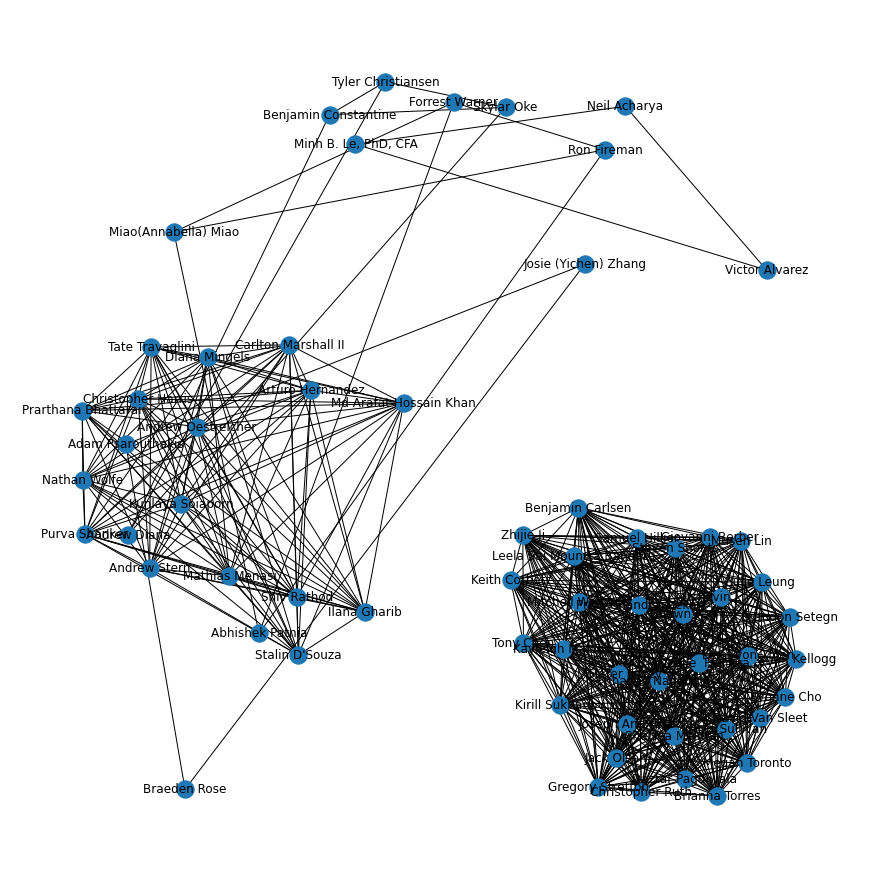

In [17]:
plt.figure(3,figsize=(12,12)) 
pos = nx.spring_layout(G,k=10/math.sqrt(G.order()))
nx.draw(G, pos, with_labels=True)
plt.show()

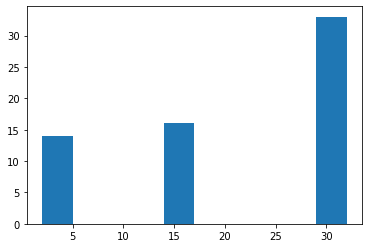

In [49]:
# metric 1: degree distribution

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(G)

In [81]:
# metric 2: average path length

# i think the average path is 1 within each component since the path from one node
# to another (of length 1 edge) is always the shortest path since our network contains
# all possible combinations between every individual that works for the same company
connected_comp_subgraphs = (G.subgraph(c) for c in nx.connected_components(G))
for g in connected_comp_subgraphs: 
    print(g, "has an average path length of", nx.average_shortest_path_length(g))

Graph with 4 nodes and 6 edges has an average path length of 1.0
Graph with 16 nodes and 120 edges has an average path length of 1.0
Graph with 3 nodes and 3 edges has an average path length of 1.0
Graph with 3 nodes and 3 edges has an average path length of 1.0
Graph with 4 nodes and 6 edges has an average path length of 1.0
Graph with 33 nodes and 528 edges has an average path length of 1.0


In [83]:
# additionally, here's the size of the largest component in terms of n and m
connected_comp_subgraphs = (G.subgraph(c) for c in nx.connected_components(G))
largest_subgraph = max(connected_comp_subgraphs, key = len)
print("The largest component has", largest_subgraph)

# sorted(nx.connected_components(G), key = len, reverse = True)

The largest component has Graph with 33 nodes and 528 edges


In [71]:
# metric 3(a): clustering coefficient of each node

# for unweighted graphs, the clustering of a node is the fraction of possible triangles through that node that exist
# need to noodle on this more to make sure the output of "1" is intuitive here
print(nx.clustering(G))

{'Forrest Warner': 1.0, 'Ron Fireman': 1.0, 'Abhishek Patnia': 1.0, 'Miao(Annabella) Miao': 1.0, 'Prarthana Bhattarai': 1.0, 'Christopher Harris': 1.0, 'Md Arafat Hossain Khan': 1.0, 'Shiv Rathod': 1.0, 'Purva Shanker': 1.0, 'Diana Mingels': 1.0, 'Andrew Stern': 1.0, 'Ilana Gharib': 1.0, "Stalin D'Souza": 1.0, 'Nathan Wolfe': 1.0, 'Arturo Hernandez': 1.0, 'Andrew Oestreicher': 1.0, 'Mathias Menasi': 1.0, 'Carlton Marshall II': 1.0, 'Kunlaya Soiaporn': 1.0, 'Tate Travaglini': 1.0, 'Josie (Yichen) Zhang': 1.0, 'Adam Psarouthakis': 1.0, 'Braeden Rose': 1.0, 'Minh B. Le, PhD, CFA': 1.0, 'Neil Acharya': 1.0, 'Victor Alvarez': 1.0, 'Benjamin Constantine': 1.0, 'Skylar Oke': 1.0, 'Andrew Diana': 1.0, 'Tyler Christiansen': 1.0, 'Daztar Pagdiwala': 1.0, 'Evonne Cho': 1.0, 'Julie Leung': 1.0, 'Brandon Setegn': 1.0, 'Liam von Thien': 1.0, 'David Van Sleet': 1.0, 'Giovanni Berber': 1.0, 'Keith Corbett': 1.0, 'Kayleigh Malone': 1.0, 'Christopher Ruth': 1.0, 'Brianna Torres': 1.0, 'Jack Olson': 1.0,

In [78]:
# metric 3(b): average clustering of the graph

print("The average clustering coefficient for the graph is", nx.average_clustering(G))

The average clustering coefficient for the graph is 1.0


In [ ]:
# metric 4: C(k)

# in progress!